Proyecto final modulo 2 - Bedu.
Procesamiento de datos con Python 
Gilberto Henriquez


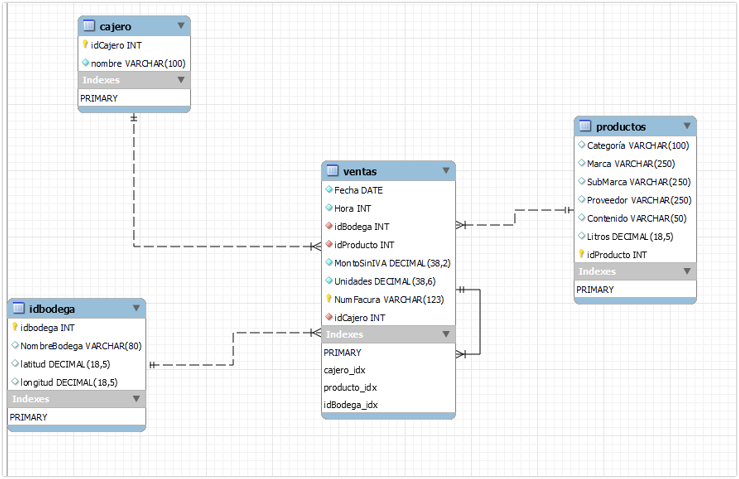

In [1]:
from IPython.display import Image
Image(filename='esquema de la base de datos.png')

In [2]:
import pandas as pd
import pymssql          ##Conexion a MSSQL
import numpy as np      ##para manejo de nan
import datetime
import matplotlib.pyplot as plt
from pandas import DataFrame

In [3]:
df_ventas = pd.read_csv('./Data/ventas.csv')

df_ventas.head(5)

,Fecha,Hora,idBodega,idProducto,MontoSinIVA,Unidades,NumFactura,idCajero
0,2019-03-01,10,8,10278636,7.70,2,8042000053807,42
1,2019-03-01,16,8,11386497,0.98,2,8042000053922,42
2,2019-03-01,21,8,735295,1.96,2,8033000328873,33
3,2019-03-01,19,39,9625130,1.26,2,39046000339984,46
4,2019-03-01,18,7,904779,0.80,2,7096000032910,96


In [4]:
##limpieza de datos

df_ventas['MontoSinIVA'] = df_ventas['MontoSinIVA'].replace(np.nan, 0)
df_ventas['Unidades'] = df_ventas['Unidades'].replace(np.nan, 0)


In [5]:
##limpieza de datos
df_ventas.dropna(axis=0, how='any' , subset=['Fecha','Hora','idBodega','NumFactura','idCajero'], inplace=False)

,Fecha,Hora,idBodega,idProducto,MontoSinIVA,Unidades,NumFactura,idCajero
0,2019-03-01,10,8,10278636,7.70,2,8042000053807,42
1,2019-03-01,16,8,11386497,0.98,2,8042000053922,42
2,2019-03-01,21,8,735295,1.96,2,8033000328873,33
3,2019-03-01,19,39,9625130,1.26,2,39046000339984,46
4,2019-03-01,18,7,904779,0.80,2,7096000032910,96
...,...,...,...,...,...,...,...,...
308438,2020-12-30,11,10,8184862,4.85,1,10030000462487,30
308439,2020-12-30,11,10,503030,8.95,1,10012000592847,12
308440,2020-12-30,11,10,776233,1.98,1,10019000214621,19
308441,2020-12-30,8,10,12816818,7.50,1,10018000261405,18


In [6]:
df_ventas.dtypes

Fecha           object
Hora             int64
idBodega         int64
idProducto       int64
MontoSinIVA    float64
Unidades         int64
NumFactura       int64
idCajero         int64
dtype: object

In [7]:
df_productos = pd.read_csv('./Data/productos.csv', index_col=6)

df_productos.head()

,Categoría,Marca,SubMarca,Proveedor,Contenido,Litros
idProducto,,,,,,
12961487,Cervezas,Saint Archer,Saint Archer Gold,Feduro,355 Ml,0.355
12695982,Cervezas,Ballast Point,Ballast Point Bonito,Otros,355 Ml,0.355
12696022,Cervezas,La Rana Dorada,La Rana Dorada Blanche,Otros,355 Ml,0.355
12012242,Vinos,Peñasol,Peñasol,Global Brands,750 Ml,0.750
6432018,Vinos,Marques De Caceres,Marques De Caceres,Swg,750 Ml,0.750


In [8]:
#df_productos.describe()

In [9]:
df_productos.dtypes

Categoría     object
Marca         object
SubMarca      object
Proveedor     object
Contenido     object
Litros       float64
dtype: object

In [10]:
df_idBodega = pd.read_csv('./Data/idBodega.csv', index_col=0)

df_idBodega.head()

,NombreBodega,Latitud,Longitud
idbodega,,,
7,Bodega Principal,7.964837,-80.431418
8,Bodega Cuarta,7.964837,-80.431418
10,Bodega Secundaria,9.051577,-79.450947
39,Tercera Bodega,8.496936,-80.334014


In [11]:
df_idBodega.dtypes

NombreBodega     object
Latitud         float64
Longitud        float64
dtype: object

In [12]:
#df_idBodega.describe()

In [13]:
df_cajero = pd.read_csv('./Data/cajero.csv', index_col=0)

df_cajero.head()

,nombre
idcajero,
93,Hugo González
55,Martín Muñoz
84,Lucas Rojas
96,Mateo Díaz
68,Leo Pérez


In [14]:
#df_cajero.describe()

In [15]:
##Agregar ajustes al df de ventas

df_ajustes = pd.read_csv('./Data/Devoluciones.csv')
df_ajustes.head(5)

,Fecha,Hora,idBodega,idProducto,MontoSinIVA,Unidades,NumFactura,idCajero
0,2019-03-01,10,8,10278636,-7.70,-2,8042000053807,42
1,2019-03-01,16,8,11386497,-0.98,-2,8042000053922,42
2,2019-03-01,21,8,735295,-1.96,-2,8033000328873,33
3,2019-03-01,19,39,9625130,-1.26,-2,39046000339984,46
4,2019-03-01,18,7,904779,-0.80,-2,7096000032910,96


In [16]:
##df_ventas.append(df_ajustes)

df_ventas=pd.concat([df_ventas, df_ajustes])

Crear tabla no normalizada a traves de merge de todas las fuentes de información csv: 
df_cajero, df_idBodega, df_productos, df_ventas

In [17]:
df_merge_completo = df_ventas.merge(df_cajero, how='left', left_on='idCajero', right_index=True )

In [18]:
df_merge_completo = df_merge_completo.merge(df_idBodega, how='left', left_on='idBodega', right_index=True )

In [19]:
df_merge_completo = df_merge_completo.merge(df_productos, how='left', left_on='idProducto', right_index=True )

In [20]:
df_merge_completo.head(3)

,Fecha,Hora,idBodega,idProducto,MontoSinIVA,Unidades,NumFactura,idCajero,nombre,NombreBodega,Latitud,Longitud,Categoría,Marca,SubMarca,Proveedor,Contenido,Litros
0,2019-03-01,10,8,10278636,7.70,2,8042000053807,42,Álex Valenzuela,Bodega Cuarta,7.964837,-80.431418,Vinos,Clos De Pirque,Clos De Pirque,Felipe Motta,1000 Ml,1.000
1,2019-03-01,16,8,11386497,0.98,2,8042000053922,42,Álex Valenzuela,Bodega Cuarta,7.964837,-80.431418,Cervezas,Miller Ultra,Miller Ultra,Feduro,355 Ml,0.355
2,2019-03-01,21,8,735295,1.96,2,8033000328873,33,Sergio Carrasco,Bodega Cuarta,7.964837,-80.431418,Cervezas,Miller Mgd,Miller Mgd,Feduro,355 Ml,0.355


In [21]:
df_merge_completo["ContenidoTotal"] = (df_merge_completo['Unidades']*df_merge_completo['Litros'])

In [22]:
df_merge_completo.head(3)

,Fecha,Hora,idBodega,idProducto,MontoSinIVA,Unidades,NumFactura,idCajero,nombre,NombreBodega,Latitud,Longitud,Categoría,Marca,SubMarca,Proveedor,Contenido,Litros,ContenidoTotal
0,2019-03-01,10,8,10278636,7.70,2,8042000053807,42,Álex Valenzuela,Bodega Cuarta,7.964837,-80.431418,Vinos,Clos De Pirque,Clos De Pirque,Felipe Motta,1000 Ml,1.000,2.00
1,2019-03-01,16,8,11386497,0.98,2,8042000053922,42,Álex Valenzuela,Bodega Cuarta,7.964837,-80.431418,Cervezas,Miller Ultra,Miller Ultra,Feduro,355 Ml,0.355,0.71
2,2019-03-01,21,8,735295,1.96,2,8033000328873,33,Sergio Carrasco,Bodega Cuarta,7.964837,-80.431418,Cervezas,Miller Mgd,Miller Mgd,Feduro,355 Ml,0.355,0.71


In [23]:
ls = df_merge_completo.groupby(['Fecha'])['MontoSinIVA'].agg(sum)
ls 

Fecha
2019-01-02     1446.17
2019-01-03     1400.44
2019-01-04     2143.61
2019-01-05     3723.83
2019-01-06     2637.93
                ...   
2020-12-22    10448.44
2020-12-23     2421.42
2020-12-24     4027.51
2020-12-28      938.34
2020-12-30     1101.81
Name: MontoSinIVA, Length: 515, dtype: float64

In [24]:
def fechaano(Fecha):
    try:
        X = str(Fecha)  
        return(int(X[:4]))
    except:
        return(0)


def fechames(Fecha):
    try:
        X = str(Fecha)
        return(int(X[5:7]))
    except:
        return(0)

def fechadia(Fecha):
    try:
        X = str(Fecha)
        return(int(X[8:]))
    except:
        return(0)        


In [25]:
df_merge_completo["Ano"] = df_merge_completo['Fecha'].apply(fechaano)
df_merge_completo["Mes"] = df_merge_completo['Fecha'].apply(fechames)
df_merge_completo["Dia"] = df_merge_completo['Fecha'].apply(fechadia)

In [26]:
df_merge_completo.head(5)

,Fecha,Hora,idBodega,idProducto,MontoSinIVA,Unidades,NumFactura,idCajero,nombre,NombreBodega,...,Categoría,Marca,SubMarca,Proveedor,Contenido,Litros,ContenidoTotal,Ano,Mes,Dia
0,2019-03-01,10,8,10278636,7.70,2,8042000053807,42,Álex Valenzuela,Bodega Cuarta,...,Vinos,Clos De Pirque,Clos De Pirque,Felipe Motta,1000 Ml,1.000,2.00,2019,3,1
1,2019-03-01,16,8,11386497,0.98,2,8042000053922,42,Álex Valenzuela,Bodega Cuarta,...,Cervezas,Miller Ultra,Miller Ultra,Feduro,355 Ml,0.355,0.71,2019,3,1
2,2019-03-01,21,8,735295,1.96,2,8033000328873,33,Sergio Carrasco,Bodega Cuarta,...,Cervezas,Miller Mgd,Miller Mgd,Feduro,355 Ml,0.355,0.71,2019,3,1
3,2019-03-01,19,39,9625130,1.26,2,39046000339984,46,Rubén Ortiz,Tercera Bodega,...,Cervezas,Atlas Golden Light,Atlas Golden Light,Cervecería Nacional,355 Ml,0.355,0.71,2019,3,1
4,2019-03-01,18,7,904779,0.80,2,7096000032910,96,Mateo Díaz,Bodega Principal,...,Cervezas,Soberana,Soberana,Heineken Panamá,355 Ml,0.355,0.71,2019,3,1


In [27]:
##Uso de Series - Unidades promedio

serie_unidades = df_merge_completo['Unidades'].values

serie_unidades.mean()

5.327639806923648

In [28]:
##Uso de Series - suma de ventas totales cargadas

serie_Venta = df_merge_completo['MontoSinIVA'].values

serie_Venta.sum()

1484223.3099999996

In [29]:
Verificacion_Meses = df_merge_completo.groupby(['NombreBodega','Ano','Mes'])['MontoSinIVA'].agg(Total_Venta_Mensual = sum)
#Verificacion_Meses - exportado a CSV porque Visual Studio Code no puede desplegarlo abajo de manera completa.

Verificacion_Meses.to_csv(r'Verificacion_Meses.txt', sep="|")



In [30]:
#uso de variables para aislar de ventas de una categoría, año, mes 

Fitro_Categoria = 'Cervezas'
Ano_busqueda    = 2020
Mes_busqueda    = 12


ls2 = df_merge_completo.loc[(df_merge_completo['Categoría'] == Fitro_Categoria) & (df_merge_completo['Ano'] == Ano_busqueda) & (df_merge_completo['Mes'] == Mes_busqueda)]


ls2.head(10)

,Fecha,Hora,idBodega,idProducto,MontoSinIVA,Unidades,NumFactura,idCajero,nombre,NombreBodega,...,Categoría,Marca,SubMarca,Proveedor,Contenido,Litros,ContenidoTotal,Ano,Mes,Dia
221684,2020-12-02,21,10,12814292,0.75,1,10003000708649,3,Jorge Núñez,Bodega Secundaria,...,Cervezas,Heineken,Heineken,Heineken Panamá,250 Ml,0.250,0.250,2020,12,2
221685,2020-12-02,21,10,12814292,0.75,1,10003000708649,3,Jorge Núñez,Bodega Secundaria,...,Cervezas,Heineken,Heineken,Heineken Panamá,250 Ml,0.250,0.250,2020,12,2
221686,2020-12-02,21,10,12814292,0.75,1,10003000708649,3,Jorge Núñez,Bodega Secundaria,...,Cervezas,Heineken,Heineken,Heineken Panamá,250 Ml,0.250,0.250,2020,12,2
221688,2020-12-02,12,10,12813546,0.69,1,10004000579466,4,Liam Rivera,Bodega Secundaria,...,Cervezas,Atlas Golden Light,Atlas Golden Light,Cervecería Nacional,355 Ml,0.355,0.355,2020,12,2
221691,2020-12-02,14,10,12813546,0.69,1,10016000236604,16,Elías Donoso,Bodega Secundaria,...,Cervezas,Atlas Golden Light,Atlas Golden Light,Cervecería Nacional,355 Ml,0.355,0.355,2020,12,2
221692,2020-12-02,14,10,12813546,0.69,1,10016000236604,16,Elías Donoso,Bodega Secundaria,...,Cervezas,Atlas Golden Light,Atlas Golden Light,Cervecería Nacional,355 Ml,0.355,0.355,2020,12,2
221693,2020-12-02,14,10,12813546,0.69,1,10016000236604,16,Elías Donoso,Bodega Secundaria,...,Cervezas,Atlas Golden Light,Atlas Golden Light,Cervecería Nacional,355 Ml,0.355,0.355,2020,12,2
221694,2020-12-02,14,10,12813546,0.69,1,10016000236604,16,Elías Donoso,Bodega Secundaria,...,Cervezas,Atlas Golden Light,Atlas Golden Light,Cervecería Nacional,355 Ml,0.355,0.355,2020,12,2
222301,2020-12-02,14,10,12813546,0.69,1,10016000236604,16,Elías Donoso,Bodega Secundaria,...,Cervezas,Atlas Golden Light,Atlas Golden Light,Cervecería Nacional,355 Ml,0.355,0.355,2020,12,2
222302,2020-12-02,14,10,12813546,0.69,1,10016000236604,16,Elías Donoso,Bodega Secundaria,...,Cervezas,Atlas Golden Light,Atlas Golden Light,Cervecería Nacional,355 Ml,0.355,0.355,2020,12,2


In [31]:
ls2.groupby(['Ano','Mes','Categoría'])['MontoSinIVA'].agg(Total=(sum))

,,,Total
Ano,Mes,Categoría,
2020,12,Cervezas,82566.94


In [32]:
#uso de variables para aislar de ventas de una categoría, año, mes 

Fitro_Categoria = 'Cervezas'
Ano_busqueda    = 2020
Mes_busqueda    = 12

def filtro_Categoria_Ano_Mes(df, Categoria, Ano, Mes):
        return (df['Categoría'] == Categoria) & (df['Ano'] == Ano) & (df['Mes'] == Mes)


ls3 = df_merge_completo.loc[filtro_Categoria_Ano_Mes(df_merge_completo, Fitro_Categoria, Ano_busqueda, Mes_busqueda) == True]
ls3

,Fecha,Hora,idBodega,idProducto,MontoSinIVA,Unidades,NumFactura,idCajero,nombre,NombreBodega,...,Categoría,Marca,SubMarca,Proveedor,Contenido,Litros,ContenidoTotal,Ano,Mes,Dia
221684,2020-12-02,21,10,12814292,0.75,1,10003000708649,3,Jorge Núñez,Bodega Secundaria,...,Cervezas,Heineken,Heineken,Heineken Panamá,250 Ml,0.250,0.250,2020,12,2
221685,2020-12-02,21,10,12814292,0.75,1,10003000708649,3,Jorge Núñez,Bodega Secundaria,...,Cervezas,Heineken,Heineken,Heineken Panamá,250 Ml,0.250,0.250,2020,12,2
221686,2020-12-02,21,10,12814292,0.75,1,10003000708649,3,Jorge Núñez,Bodega Secundaria,...,Cervezas,Heineken,Heineken,Heineken Panamá,250 Ml,0.250,0.250,2020,12,2
221688,2020-12-02,12,10,12813546,0.69,1,10004000579466,4,Liam Rivera,Bodega Secundaria,...,Cervezas,Atlas Golden Light,Atlas Golden Light,Cervecería Nacional,355 Ml,0.355,0.355,2020,12,2
221691,2020-12-02,14,10,12813546,0.69,1,10016000236604,16,Elías Donoso,Bodega Secundaria,...,Cervezas,Atlas Golden Light,Atlas Golden Light,Cervecería Nacional,355 Ml,0.355,0.355,2020,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308406,2020-12-30,12,10,12814052,0.65,1,10006000689442,6,Nil Valdés,Bodega Secundaria,...,Cervezas,Miller Lite,Miller Lite,Feduro,296 Ml,0.296,0.296,2020,12,30
308407,2020-12-30,12,10,13132409,1.10,1,10006000689442,6,Nil Valdés,Bodega Secundaria,...,Cervezas,Bavaria Holland,Bavaria Holland Sin Alcohol,Otros,330 Ml,0.330,0.330,2020,12,30
308430,2020-12-30,11,10,12816845,1.00,1,10004000583723,4,Liam Rivera,Bodega Secundaria,...,Cervezas,Negra Modelo,Negra Modelo,Cervecería Nacional,355 Ml,0.355,0.355,2020,12,30
308435,2020-12-30,11,10,12813546,0.69,1,10015000415455,15,Martí Palma,Bodega Secundaria,...,Cervezas,Atlas Golden Light,Atlas Golden Light,Cervecería Nacional,355 Ml,0.355,0.355,2020,12,30


In [33]:
ls3.groupby(['Ano','Mes','Categoría'])['MontoSinIVA'].agg(Total=(sum))

,,,Total
Ano,Mes,Categoría,
2020,12,Cervezas,82566.94


In [34]:
##Para agregar el día de la semana, utilizo una funcion que requiere que la variable se exprese como tipo fecha. 

df_merge_completo['Fecha2']= pd.to_datetime(df_merge_completo['Fecha'])

SerieFecha = df_merge_completo['Fecha2']



In [35]:
df_merge_completo['DiaSemana'] = SerieFecha.dt.day_name()

In [36]:
df_merge_completo.head(5)

,Fecha,Hora,idBodega,idProducto,MontoSinIVA,Unidades,NumFactura,idCajero,nombre,NombreBodega,...,SubMarca,Proveedor,Contenido,Litros,ContenidoTotal,Ano,Mes,Dia,Fecha2,DiaSemana
0,2019-03-01,10,8,10278636,7.70,2,8042000053807,42,Álex Valenzuela,Bodega Cuarta,...,Clos De Pirque,Felipe Motta,1000 Ml,1.000,2.00,2019,3,1,2019-03-01,Friday
1,2019-03-01,16,8,11386497,0.98,2,8042000053922,42,Álex Valenzuela,Bodega Cuarta,...,Miller Ultra,Feduro,355 Ml,0.355,0.71,2019,3,1,2019-03-01,Friday
2,2019-03-01,21,8,735295,1.96,2,8033000328873,33,Sergio Carrasco,Bodega Cuarta,...,Miller Mgd,Feduro,355 Ml,0.355,0.71,2019,3,1,2019-03-01,Friday
3,2019-03-01,19,39,9625130,1.26,2,39046000339984,46,Rubén Ortiz,Tercera Bodega,...,Atlas Golden Light,Cervecería Nacional,355 Ml,0.355,0.71,2019,3,1,2019-03-01,Friday
4,2019-03-01,18,7,904779,0.80,2,7096000032910,96,Mateo Díaz,Bodega Principal,...,Soberana,Heineken Panamá,355 Ml,0.355,0.71,2019,3,1,2019-03-01,Friday


In [37]:
dias_espanol = {'Monday':'Lunes', 'Tuesday':'Martes', 'Wednesday':'Miércoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'Sabado', 'Sunday':'Domingo'} 

df_merge_completo['DiaSemana'] = df_merge_completo['DiaSemana'].apply(lambda x: dias_espanol[x]) 

df_merge_completo.head(5)

,Fecha,Hora,idBodega,idProducto,MontoSinIVA,Unidades,NumFactura,idCajero,nombre,NombreBodega,...,SubMarca,Proveedor,Contenido,Litros,ContenidoTotal,Ano,Mes,Dia,Fecha2,DiaSemana
0,2019-03-01,10,8,10278636,7.70,2,8042000053807,42,Álex Valenzuela,Bodega Cuarta,...,Clos De Pirque,Felipe Motta,1000 Ml,1.000,2.00,2019,3,1,2019-03-01,Viernes
1,2019-03-01,16,8,11386497,0.98,2,8042000053922,42,Álex Valenzuela,Bodega Cuarta,...,Miller Ultra,Feduro,355 Ml,0.355,0.71,2019,3,1,2019-03-01,Viernes
2,2019-03-01,21,8,735295,1.96,2,8033000328873,33,Sergio Carrasco,Bodega Cuarta,...,Miller Mgd,Feduro,355 Ml,0.355,0.71,2019,3,1,2019-03-01,Viernes
3,2019-03-01,19,39,9625130,1.26,2,39046000339984,46,Rubén Ortiz,Tercera Bodega,...,Atlas Golden Light,Cervecería Nacional,355 Ml,0.355,0.71,2019,3,1,2019-03-01,Viernes
4,2019-03-01,18,7,904779,0.80,2,7096000032910,96,Mateo Díaz,Bodega Principal,...,Soberana,Heineken Panamá,355 Ml,0.355,0.71,2019,3,1,2019-03-01,Viernes


Servidor        = '172.16.1.3' 
BasedeDatos     = 'Prueba' 
Usuario         = 'ghenriquez' 
Contrasena      = '' ###Contraseña censurada. 


##Limpiar Tabla a insertar 

try:
    conn = pymssql.connect(server=Servidor, user=Usuario, password=Contrasena, database=BasedeDatos)
except:
    print ("error de conection a la Base de datos")

sql = """
    IF OBJECT_ID(N'dbo.TablaVentasStage', N'U') IS NOT NULL 
    DROP TABLE [dbo].[TablaVentasStage];
    """

cursor = conn.cursor() 
cursor.execute(sql)
conn.commit()
cursor.close() 
conn.close()



##Crear Tabla a insertar 
try:
    conn = pymssql.connect(server=Servidor, user=Usuario, password=Contrasena, database=BasedeDatos)
except:
    print ("error de conection a la Base de datos")

sql = """
            create table [dbo].[TablaVentasStage] 
            (
                Fecha date, 
                Hora int, 
                idBodega int, 
                idProducto int, 
                MontoSinIVA decimal(18,5), 
                Unidades decimal(18,5), 
                NumFactura nvarchar(50), 
                idCajero int, 
                nombre nvarchar(100), 
                NombreBodega nvarchar(50), 
                Latitud decimal(18,5), 
                Longitud decimal(18,5), 
                Categoría nvarchar(100), 
                Marca nvarchar(100), 
                SubMarca nvarchar(100), Proveedor nvarchar(100), 
                Contenido nvarchar(100), Litros decimal(18,5), 
                ContenidoTotal decimal(18,5), Ano int, Mes int, Dia int, DiaSemana nvarchar(50))"""

try:
    cursor = conn.cursor() 
    cursor.execute(sql)
    conn.commit()
    cursor.close() 
    conn.close()
except:
    print ("Error en query, verificar")



try:
    conn = pymssql.connect(server=Servidor, user=Usuario, password=Contrasena, database=BasedeDatos)
except:
    print ("error de conection a la Base de datos")


sql = 'CREATE CLUSTERED COLUMNSTORE INDEX [ClusteredColumnStoreIndex-20221207-224420] ON [dbo].[TablaVentasStage] WITH (DROP_EXISTING = OFF, COMPRESSION_DELAY = 0)'

try:
    cursor = conn.cursor() 
    cursor.execute(sql)
    conn.commit()
    cursor.close() 
    conn.close()
except:
    print ("Error en query, verificar")



df_merge_completo.head(1)

df_merge_reducido= df_merge_completo.head(50)

##escritura en BD

try:
    conn = pymssql.connect(server=Servidor, user=Usuario, password=Contrasena, database=BasedeDatos)
except:
    print ("error de conection a la Base de datos")



try:
    cursor = conn.cursor()

    for i,row in df_merge_reducido.iterrows():
        
        lista = [[df_merge_reducido['Fecha'][i], df_merge_reducido['Hora'][i],df_merge_reducido['idBodega'][i],df_merge_reducido['idProducto'][i],df_merge_reducido['MontoSinIVA'][i],df_merge_reducido['Unidades'][i],df_merge_reducido['NumFactura'][i],df_merge_reducido['idCajero'][i],df_merge_reducido['nombre'][i],df_merge_reducido['NombreBodega'][i],df_merge_reducido['Latitud'][i],df_merge_reducido['Longitud'][i],df_merge_reducido['Categoría'][i],df_merge_reducido['Marca'][i],df_merge_reducido['SubMarca'][i],df_merge_reducido['Proveedor'][i],df_merge_reducido['Contenido'][i],df_merge_reducido['Litros'][i],df_merge_reducido['ContenidoTotal'][i],df_merge_reducido['Ano'][i],df_merge_reducido['Mes'][i],df_merge_reducido['Dia'][i],df_merge_reducido['DiaSemana'][i]]]
        texto = ""

        for word in lista:
            texto += str(word) 

        texto = texto[1:len(texto)-1]
        
        sql = "insert into [dbo].[TablaVentasStage] ([Fecha], [Hora],[idBodega],[idProducto],[MontoSinIVA],[Unidades],[NumFactura],[idCajero],[nombre],[NombreBodega],[Latitud],[Longitud],[Categoría],[Marca],[SubMarca],[Proveedor],[Contenido],[Litros],[ContenidoTotal],[Ano],[Mes],[Dia],[DiaSemana]) VALUES ("

        sql = sql + texto + ");"

        cursor.execute(sql)
    
       
    conn.commit()
    cursor.close() 
    conn.close()
except:
    print ("Error en query, verificar")





##Lectura de BD y almacenamiento en DataFrame

try:
    conn = pymssql.connect(server=Servidor, user=Usuario, password=Contrasena, database=BasedeDatos)
except:
    print ("error de conection a la Base de datos")



try:
    cursor = conn.cursor()

    sql = "select * from  [dbo].[TablaVentasStage]"

    cursor.execute(sql)

    dataSelect = cursor.fetchall()

    df_lecturasql=pd.DataFrame(dataSelect)

    cursor.close()
    conn.close()
except:
    print ("Error en query, verificar")


df_lecturasql.head(10)


df_lecturasql.columns = ['Fecha', 'Hora', 'idBodega', 'idProducto', 'MontoSinIVA', 'Unidades', 'NumFactura', 'idCajero', 'nombre', 'NombreBodega', 'Latitud', 'Longitud', 'Categoría', 'Marca', 'SubMarca', 'Proveedor', 'Contenido', 'Litros', 'ContenidoTotal', 'Ano', 'Mes', 'Dia', 'DiaSemana']

df_lecturasql.sort_values('idProducto').head(10)

df_merge_completo.to_csv(r'Completo.txt', sep="|")

Modulo 3: Análisis de Datos con Python
-- Gilberto Henriquez

In [38]:
##Verificación de contenido del dataframe

df_merge_completo.head(10)

df_merge_completo[['Marca','SubMarca','Contenido','Precio','MontoSinIVA']]

,Fecha,Hora,idBodega,idProducto,MontoSinIVA,Unidades,NumFactura,idCajero,nombre,NombreBodega,...,SubMarca,Proveedor,Contenido,Litros,ContenidoTotal,Ano,Mes,Dia,Fecha2,DiaSemana
0,2019-03-01,10,8,10278636,7.70,2,8042000053807,42,Álex Valenzuela,Bodega Cuarta,...,Clos De Pirque,Felipe Motta,1000 Ml,1.000,2.000,2019,3,1,2019-03-01,Viernes
1,2019-03-01,16,8,11386497,0.98,2,8042000053922,42,Álex Valenzuela,Bodega Cuarta,...,Miller Ultra,Feduro,355 Ml,0.355,0.710,2019,3,1,2019-03-01,Viernes
2,2019-03-01,21,8,735295,1.96,2,8033000328873,33,Sergio Carrasco,Bodega Cuarta,...,Miller Mgd,Feduro,355 Ml,0.355,0.710,2019,3,1,2019-03-01,Viernes
3,2019-03-01,19,39,9625130,1.26,2,39046000339984,46,Rubén Ortiz,Tercera Bodega,...,Atlas Golden Light,Cervecería Nacional,355 Ml,0.355,0.710,2019,3,1,2019-03-01,Viernes
4,2019-03-01,18,7,904779,0.80,2,7096000032910,96,Mateo Díaz,Bodega Principal,...,Soberana,Heineken Panamá,355 Ml,0.355,0.710,2019,3,1,2019-03-01,Viernes
5,2019-03-01,18,7,9625130,1.30,2,7093000077789,93,Hugo González,Bodega Principal,...,Atlas Golden Light,Cervecería Nacional,355 Ml,0.355,0.710,2019,3,1,2019-03-01,Viernes
6,2019-03-01,16,10,10658899,1.95,3,10009000780846,9,Luis Navarro,Bodega Secundaria,...,Atlas,Cervecería Nacional,355 Ml,0.355,1.065,2019,3,1,2019-03-01,Viernes
7,2019-03-01,20,10,410737,1.95,3,10052000071991,52,Alejandro Contreras,Bodega Secundaria,...,Balboa,Cervecería Nacional,355 Ml,0.355,1.065,2019,3,1,2019-03-01,Viernes
8,2019-03-01,15,8,503012,26.85,3,8034000476283,34,Nicolás Gómez,Bodega Cuarta,...,Casillero del Diablo Reserva,Felipe Motta,750 Ml,0.750,2.250,2019,3,1,2019-03-01,Viernes
9,2019-03-01,20,39,11386497,1.47,3,39059000021317,59,Eric Figueroa,Tercera Bodega,...,Miller Ultra,Feduro,355 Ml,0.355,1.065,2019,3,1,2019-03-01,Viernes


In [39]:
##Verificacion de tipos de datos para futuros usos

df_merge_completo.dtypes

Fecha                     object
Hora                       int64
idBodega                   int64
idProducto                 int64
MontoSinIVA              float64
Unidades                   int64
NumFactura                 int64
idCajero                   int64
nombre                    object
NombreBodega              object
Latitud                  float64
Longitud                 float64
Categoría                 object
Marca                     object
SubMarca                  object
Proveedor                 object
Contenido                 object
Litros                   float64
ContenidoTotal           float64
Ano                        int64
Mes                        int64
Dia                        int64
Fecha2            datetime64[ns]
DiaSemana                 object
dtype: object

In [40]:
##Precio (uso de operaciones numéricas)

df_merge_completo["Precio"] = df_merge_completo["MontoSinIVA"]/df_merge_completo["Unidades"]

df_merge_completo.head(5)


,Fecha,Hora,idBodega,idProducto,MontoSinIVA,Unidades,NumFactura,idCajero,nombre,NombreBodega,...,Proveedor,Contenido,Litros,ContenidoTotal,Ano,Mes,Dia,Fecha2,DiaSemana,Precio
0,2019-03-01,10,8,10278636,7.70,2,8042000053807,42,Álex Valenzuela,Bodega Cuarta,...,Felipe Motta,1000 Ml,1.000,2.00,2019,3,1,2019-03-01,Viernes,3.85
1,2019-03-01,16,8,11386497,0.98,2,8042000053922,42,Álex Valenzuela,Bodega Cuarta,...,Feduro,355 Ml,0.355,0.71,2019,3,1,2019-03-01,Viernes,0.49
2,2019-03-01,21,8,735295,1.96,2,8033000328873,33,Sergio Carrasco,Bodega Cuarta,...,Feduro,355 Ml,0.355,0.71,2019,3,1,2019-03-01,Viernes,0.98
3,2019-03-01,19,39,9625130,1.26,2,39046000339984,46,Rubén Ortiz,Tercera Bodega,...,Cervecería Nacional,355 Ml,0.355,0.71,2019,3,1,2019-03-01,Viernes,0.63
4,2019-03-01,18,7,904779,0.80,2,7096000032910,96,Mateo Díaz,Bodega Principal,...,Heineken Panamá,355 Ml,0.355,0.71,2019,3,1,2019-03-01,Viernes,0.40


In [41]:
##Calculo del precio promedio total de la venta en dinero y en cantidad de productos
df_merge_completo[["Precio","Unidades"]].mean()

Precio      2.224189
Unidades    5.327640
dtype: float64

In [42]:
##Calculo del precio mas común (mediana) total de la venta y cantidad de productos
df_merge_completo[["Precio","Unidades"]].median()


Precio      0.65
Unidades    1.00
dtype: float64

In [43]:
df_merge_completo[["Precio","Unidades"]].min()

Precio          0.0
Unidades   -55610.0
dtype: float64

In [44]:
df_merge_completo[["Precio","Unidades"]].max()

Precio        125.0
Unidades    55610.0
dtype: float64

In [45]:
df_merge_completo[["Precio","Unidades","MontoSinIVA"]].describe()

,Precio,Unidades,MontoSinIVA
count,308479.000000,308479.000000,308479.000000
mean,2.224189,5.327640,4.811424
std,4.298908,142.288161,78.366074
min,0.000000,-55610.000000,-30585.500000
25%,0.520000,1.000000,0.650000
50%,0.650000,1.000000,3.540000
75%,1.150000,6.000000,6.600000
max,125.000000,55610.000000,30585.500000


In [46]:
##Conteo de registros por tienda 
df_merge_completo[['NombreBodega',"Ano"]].value_counts()



NombreBodega       Ano 
Tercera Bodega     2019    59295
                   2020    53350
Bodega Secundaria  2019    51131
                   2020    42003
Bodega Principal   2019    37293
                   2020    31537
Bodega Cuarta      2019    17425
                   2020    16445
dtype: int64

In [47]:
##Comercialmente el conteo es sólo de registros, funcionalmente lo que se requiere es número unico de facturas, ventas agregadas por periodo/sucursal

df_temporal = df_merge_completo.drop(["Hora","idBodega","idProducto","idCajero","Latitud","Longitud","Litros","Mes","Dia","Precio","Fecha","nombre","Categoría","Marca","SubMarca","Proveedor","Contenido","ContenidoTotal","Fecha2","DiaSemana"], axis=1)

df_agrupado_pdv_ano_factura = df_temporal.groupby(by=['NombreBodega',"Ano"]).agg({"MontoSinIVA" : ["sum"], "Unidades" : ["sum"], "NumFactura" : ["nunique","count"] } )

df_agrupado_pdv_ano_factura

## se puede apreciar la comparación entre count - Valor equivocado, y es el mismo que en el query anterior, vs el conteo de valores únicos nunique

MontoSinIVA Unidades NumFactura       
                               sum      sum    nunique  count
NombreBodega      Ano                                        
Bodega Cuarta     2019   127049.29   108303      12185  17425
                  2020    79232.45    63937       9201  16445
Bodega Principal  2019   279636.24   343941      24834  37293
                  2020   110826.70   102031      13412  31537
Bodega Secundaria 2019   247525.39   225625      35805  51131
                  2020   108456.06   100186      15501  42003
Tercera Bodega    2019   360803.47   494056      38286  59295
                  2020   170693.71   205386      19110  53350

In [48]:
df_temporal.agg({"NumFactura" : ["nunique","count"] } )

,NumFactura
nunique,168334
count,308479


In [49]:
##Conteo de registros por Categoría/marca
##Comercialmente esto esboza la penetración o existencia de una marca de un producto en las ventas.  Existe un total de 168 334 facturas únicas en el dataframe
##PAra el primer producto, Cerveza Atlas Golden Light, eso quiere decir una penetración de 68211 / 168334  --> Alrededor del 41%

df_merge_completo[["Categoría","Marca"]].value_counts()

##df_merge_completo[["Categoría","Marca"]].value_counts().to_csv("DocumentoCategoríaMarca.csv")

Categoría          Marca             
Cervezas           Atlas Golden Light    68211
                   Atlas                 31087
                   Balboa Ice            18576
                   Panama Light          15081
                   Balboa                11157
                                         ...  
Vinos              Vinum Missae              1
Cervezas           Grolsch                   1
Vinos              Pedregal                  1
Ron y aguardiente  Mount Gay                 1
Cervezas           Guachiman                 1
Length: 221, dtype: int64

In [50]:
## Calculo de la media truncada del precio (eliminando 10% de los outlayers, 5% superior y 5% inferior) para el precio, unidades vendidas y monto sin iva. 

from scipy import stats


df_temporal2 = stats.trim_mean(df_merge_completo[["Precio","Unidades","MontoSinIVA"]], 0.1)

Precio_10       = "{:.2f}".format(df_temporal2[0])
Unidades_10     = "{:.2f}".format(df_temporal2[1])
MontoSinIva     = "{:.2f}".format(df_temporal2[2])


##Uso de Variables e interpolación de cadenas

print(f'La media del precio ajustado es {Precio_10}, de las Unidades es {Unidades_10} y del Monto de Venta sin iva:  {MontoSinIva}')




La media del precio ajustado es 1.20, de las Unidades es 3.42 y del Monto de Venta sin iva:  3.70


In [51]:
##Filtrar - Ignorar las transacciones de ajustes/devoluciones

df_merge_VentasPositivas = df_merge_completo[ (df_merge_completo['MontoSinIVA'] > 0) & (df_merge_completo['Unidades'] > 0)]

df_merge_VentasPositivas.head(3)


,Fecha,Hora,idBodega,idProducto,MontoSinIVA,Unidades,NumFactura,idCajero,nombre,NombreBodega,...,Proveedor,Contenido,Litros,ContenidoTotal,Ano,Mes,Dia,Fecha2,DiaSemana,Precio
0,2019-03-01,10,8,10278636,7.70,2,8042000053807,42,Álex Valenzuela,Bodega Cuarta,...,Felipe Motta,1000 Ml,1.000,2.00,2019,3,1,2019-03-01,Viernes,3.85
1,2019-03-01,16,8,11386497,0.98,2,8042000053922,42,Álex Valenzuela,Bodega Cuarta,...,Feduro,355 Ml,0.355,0.71,2019,3,1,2019-03-01,Viernes,0.49
2,2019-03-01,21,8,735295,1.96,2,8033000328873,33,Sergio Carrasco,Bodega Cuarta,...,Feduro,355 Ml,0.355,0.71,2019,3,1,2019-03-01,Viernes,0.98


In [52]:
df_temporal2 = stats.trim_mean(df_merge_VentasPositivas[["Precio","Unidades","MontoSinIVA"]], 0.1)

Precio_10       = "{:.2f}".format(df_temporal2[0])
Unidades_10     = "{:.2f}".format(df_temporal2[1])
MontoSinIva     = "{:.2f}".format(df_temporal2[2])


##Uso de Variables e interpolación de cadenas

print(f'La media del precio ajustado doblemente (eliminando devoluciones) es {Precio_10}, de las Unidades es {Unidades_10} y del Monto de Venta sin iva:  {MontoSinIva}')



La media del precio ajustado doblemente (eliminando devoluciones) es 1.20, de las Unidades es 3.46 y del Monto de Venta sin iva:  3.76


In [53]:
##Se evalúa el nuevo DF: df_merge_VentasPositivas

##df_merge_VentasPositivas[['Precio','Unidades',"MontoSinIVA"]].std()

In [54]:
df_merge_VentasPositivas[["Precio","Unidades","MontoSinIVA"]].describe()

,Precio,Unidades,MontoSinIVA
count,304575.000000,304575.000000,304575.000000
mean,2.221755,5.639626,5.055346
std,4.288222,101.714801,56.055873
min,0.070000,1.000000,0.100000
25%,0.520000,1.000000,0.650000
50%,0.650000,1.000000,3.720000
75%,1.150000,6.000000,6.600000
max,125.000000,55610.000000,30585.500000


In [55]:
##Quantiles de la categoría Vinos


df_vinos = df_merge_VentasPositivas[df_merge_VentasPositivas["Categoría"] == "Vinos"]

print("Categoría: Vinos")
print("Percentiles de Precio:\n")

print(f'Valor mínimo: {df_vinos["Precio"].min()}')
print(f'Percentil 0: {df_vinos["Precio"].quantile(0)}')
print(f'Percentil 10: {df_vinos["Precio"].quantile(0.1)}')
print(f'Percentil 20: {df_vinos["Precio"].quantile(0.2)}')
print(f'Percentil 25: {df_vinos["Precio"].quantile(0.25)}')
print(f'Percentil 50: {df_vinos["Precio"].median()}')
print(f'Percentil 75: {df_vinos["Precio"].quantile(0.75)}')
print(f'Percentil 90: {df_vinos["Precio"].quantile(0.9)}')
print(f'Percentil 100: {df_vinos["Precio"].quantile(1)}')
print(f'Valor máximo: {df_vinos["Precio"].max()}')
print()
print(f'Media: {df_vinos["Precio"].mean()}')

Categoría: Vinos
Percentiles de Precio:

Valor mínimo: 1.48
Percentil 0: 1.48
Percentil 10: 2.25
Percentil 20: 2.55
Percentil 25: 3.1
Percentil 50: 4.85
Percentil 75: 5.85
Percentil 90: 8.0
Percentil 100: 34.7
Valor máximo: 34.7

Media: 5.017263309894526


In [56]:
import seaborn as sns # De graficación
import matplotlib.pyplot as plt # De graficación

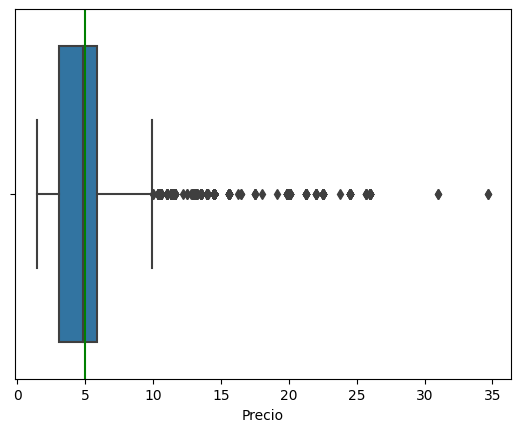

In [57]:
sns.boxplot(x=df_vinos["Precio"])
plt.axvline(df_vinos["Precio"].mean(), c='green')

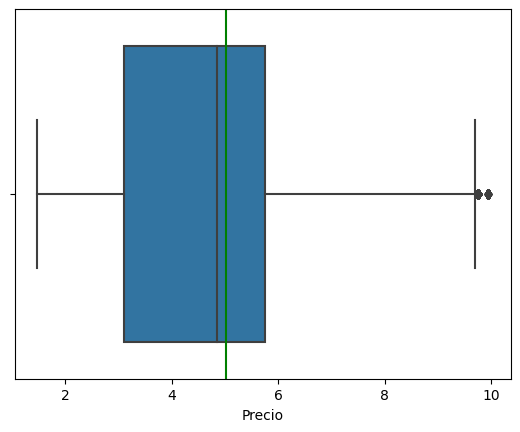

In [58]:
iqr = df_vinos["Precio"].quantile(0.75) - df_vinos["Precio"].quantile(0.25) # Score de Rango interquartilico
filtro_inferior = df_vinos["Precio"] > df_vinos["Precio"].quantile(0.25) - (iqr * 1.5)
filtro_superior = df_vinos["Precio"] < df_vinos["Precio"].quantile(0.75) + (iqr * 1.5)

df_filtrado = df_vinos[filtro_inferior & filtro_superior]

sns.boxplot(x=df_filtrado["Precio"])
plt.axvline(df_vinos["Precio"].mean(), c='green')

In [59]:
##Análisis de las Cervezas

df_cervezas = df_merge_VentasPositivas[df_merge_VentasPositivas["Categoría"] == "Cervezas"]

df_cervezas.head(5)

,Fecha,Hora,idBodega,idProducto,MontoSinIVA,Unidades,NumFactura,idCajero,nombre,NombreBodega,...,Proveedor,Contenido,Litros,ContenidoTotal,Ano,Mes,Dia,Fecha2,DiaSemana,Precio
1,2019-03-01,16,8,11386497,0.98,2,8042000053922,42,Álex Valenzuela,Bodega Cuarta,...,Feduro,355 Ml,0.355,0.71,2019,3,1,2019-03-01,Viernes,0.49
2,2019-03-01,21,8,735295,1.96,2,8033000328873,33,Sergio Carrasco,Bodega Cuarta,...,Feduro,355 Ml,0.355,0.71,2019,3,1,2019-03-01,Viernes,0.98
3,2019-03-01,19,39,9625130,1.26,2,39046000339984,46,Rubén Ortiz,Tercera Bodega,...,Cervecería Nacional,355 Ml,0.355,0.71,2019,3,1,2019-03-01,Viernes,0.63
4,2019-03-01,18,7,904779,0.80,2,7096000032910,96,Mateo Díaz,Bodega Principal,...,Heineken Panamá,355 Ml,0.355,0.71,2019,3,1,2019-03-01,Viernes,0.40
5,2019-03-01,18,7,9625130,1.30,2,7093000077789,93,Hugo González,Bodega Principal,...,Cervecería Nacional,355 Ml,0.355,0.71,2019,3,1,2019-03-01,Viernes,0.65


In [60]:
##Tabla de frecuencia de precios de las Cervezas, dividido en 30 intervalos

segmentos = pd.cut(df_cervezas["Precio"], 30)

df_cervezas["Precio"].groupby(segmentos).count()

Precio
(0.0301, 1.4]       234717
(1.4, 2.731]          5555
(2.731, 4.061]         570
(4.061, 5.391]         321
(5.391, 6.722]        2716
(6.722, 8.052]        2806
(8.052, 9.382]         211
(9.382, 10.713]        513
(10.713, 12.043]       390
(12.043, 13.373]        35
(13.373, 14.704]       546
(14.704, 16.034]         0
(16.034, 17.364]        12
(17.364, 18.695]        12
(18.695, 20.025]         0
(20.025, 21.355]         0
(21.355, 22.686]         0
(22.686, 24.016]         0
(24.016, 25.346]        54
(25.346, 26.677]         0
(26.677, 28.007]         0
(28.007, 29.337]         0
(29.337, 30.668]         0
(30.668, 31.998]         0
(31.998, 33.328]         0
(33.328, 34.659]         0
(34.659, 35.989]         0
(35.989, 37.319]         0
(37.319, 38.65]          0
(38.65, 39.98]         106
Name: Precio, dtype: int64

<AxesSubplot: title={'center': 'Grafica de Frecuencias de precio de Cervezas por proveedor'}, xlabel='Rangos de Precio (USD)', ylabel='Cantidad de Facturas'>

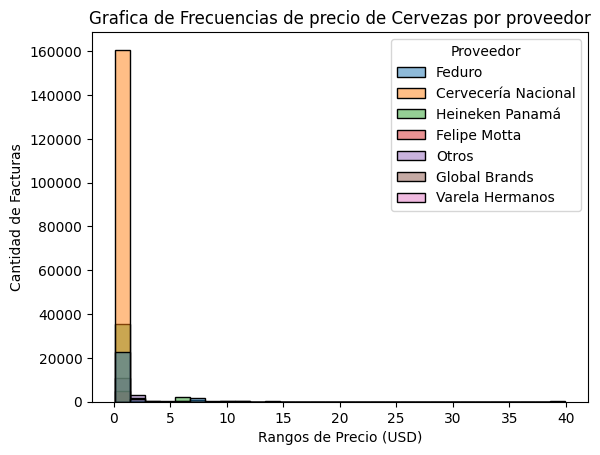

In [61]:
##La misma tabla de frecuencia, pero ahora esbozada de manera gráfica, y coloreada por proveedor de dicha cerveza

import seaborn as sns

Grafica = sns.histplot(data=df_cervezas["Precio"],bins=30 ,hue=df_cervezas["Proveedor"], x=df_cervezas["Precio"])

Grafica.set(ylabel="Cantidad de Facturas", xlabel= "Rangos de Precio (USD)", title="Grafica de Frecuencias de precio de Cervezas por proveedor")

Grafica

In [62]:
## Se analizará la distribucion del monto total de la factura para el mes de diciembre del año 2020 

df_2020_facturas =  df_merge_completo[(df_merge_completo['Ano'] == 2020) & (df_merge_completo['Mes'] == 12) & (df_merge_completo['NombreBodega'] == 'Tercera Bodega')].groupby('NumFactura').agg({'MontoSinIVA' : 'sum'})

list_2020_facturas = df_2020_facturas.to_numpy()

###len(list_2020_facturas)


In [63]:
list_2020_facturas

array([[23.  ],
       [ 8.28],
       [ 7.2 ],
       ...,
       [ 3.85],
       [ 5.  ],
       [23.96]])

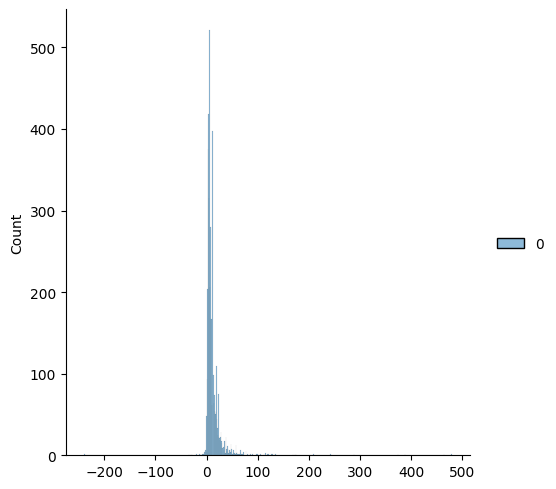

In [64]:
sns.displot(list_2020_facturas,kde=False)##, bins= 20)


In [65]:
from scipy.stats import skew, kurtosis

print(f'Media:  {list_2020_facturas.mean()}')
print(f'Curtosis: {kurtosis(list_2020_facturas)}')
print(f'Asimetría: {skew(list_2020_facturas)}')

## Asimetría positiva, significa que tiene mas valores a la izquierda de la media

##Curtosis sumamente positiva y numero grande, por lo que la distribucion es muy alta - Leptocúrtica, porque hay muchos datos concentrados alrededor de la media.

##El efecto de valores negativos genera que la grafica no inicie en CERO.

Media:  11.813570938999314
Curtosis: [206.41673226]
Asimetría: [10.53456159]


In [66]:
## Ahora se motrarán Todos las Sucursales bajo una grafica de Densidad. 

print(df_merge_completo["NombreBodega"].unique())



['Bodega Cuarta' 'Tercera Bodega' 'Bodega Principal' 'Bodega Secundaria']


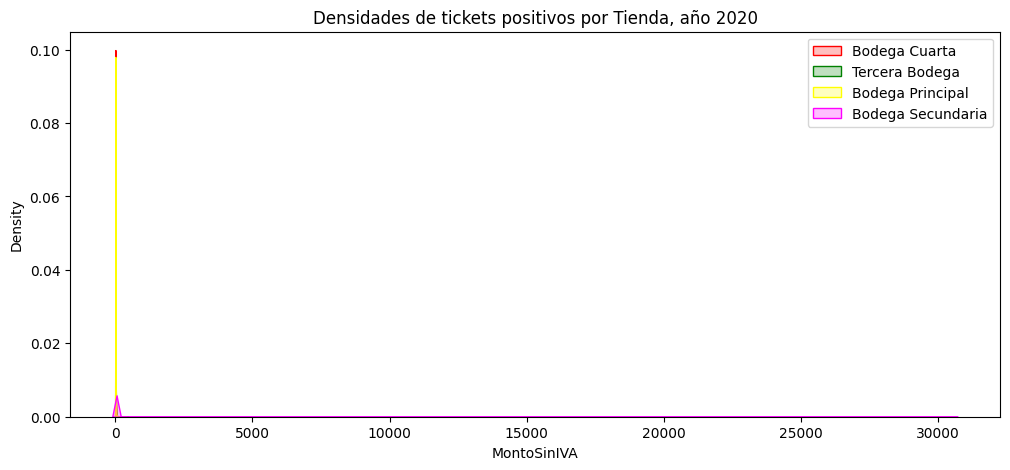

In [67]:
df_2020_facturas_Bod4ta =  df_merge_completo[(df_merge_completo['Ano'] == 2020) & (df_merge_completo['MontoSinIVA'] > 0)  & (df_merge_completo['NombreBodega'] == 'Bodega Cuarta')].groupby('NumFactura').agg({'MontoSinIVA' : 'sum'})
df_2020_facturas_Bod3ra =  df_merge_completo[(df_merge_completo['Ano'] == 2020) & (df_merge_completo['MontoSinIVA'] > 0)  & (df_merge_completo['NombreBodega'] == 'Tercera Bodega')].groupby('NumFactura').agg({'MontoSinIVA' : 'sum'})
df_2020_facturas_Bod1ra =  df_merge_completo[(df_merge_completo['Ano'] == 2020) & (df_merge_completo['MontoSinIVA'] > 0)  & (df_merge_completo['NombreBodega'] == 'Bodega Principal')].groupby('NumFactura').agg({'MontoSinIVA' : 'sum'})
df_2020_facturas_Bod2da =  df_merge_completo[(df_merge_completo['Ano'] == 2020) & (df_merge_completo['MontoSinIVA'] > 0)  & (df_merge_completo['NombreBodega'] == 'Bodega Secundaria')].groupby('NumFactura').agg({'MontoSinIVA' : 'sum'})


fig, ax = plt.subplots()
##sns.set(rc={'figure.figsize':(100,10)})

fig.set_size_inches(12,5)

sns.kdeplot(data= df_2020_facturas_Bod4ta["MontoSinIVA"],fill=True, color = "red", ax= ax, label ="Bodega Cuarta")
sns.kdeplot(data= df_2020_facturas_Bod3ra["MontoSinIVA"],fill=True, color = "green", ax= ax, label ='Tercera Bodega')
sns.kdeplot(data= df_2020_facturas_Bod1ra["MontoSinIVA"],fill=True, color = "yellow", ax= ax, label ='Bodega Principal')
sns.kdeplot(data= df_2020_facturas_Bod2da["MontoSinIVA"],fill=True, color = "magenta", ax= ax, label ='Bodega Secundaria')

ax.set_title("Densidades de tickets positivos por Tienda, año 2020")
ax.legend(loc="best")




In [68]:
##Ahora se generará una gráfica de barras de venta por categoría en cada tienda/bodega

print(df_merge_completo["Categoría"].unique())


['Vinos' 'Cervezas' 'Ron y aguardiente' 'Whisky' 'Vodka'
 'Tequila y complementos' 'Ginebra' 'Brandy' 'Cognac']


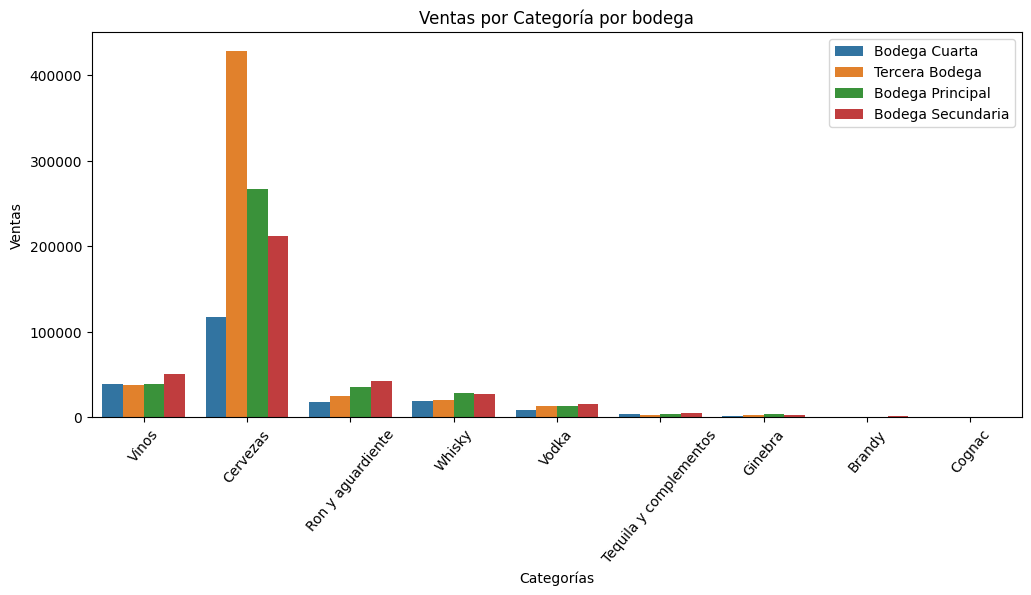

In [69]:
fig, ax = plt.subplots()

fig.set_size_inches(12,5)

ax = sns.barplot(x="Categoría", y="MontoSinIVA", data=df_merge_completo, hue=df_merge_completo['NombreBodega'], errorbar=None, estimator="sum") 

ax.set_title("Ventas por Categoría por bodega")
ax.legend(loc="best")
ax.set(ylabel='Ventas')
ax.set(xlabel='Categorías')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

plt.show()


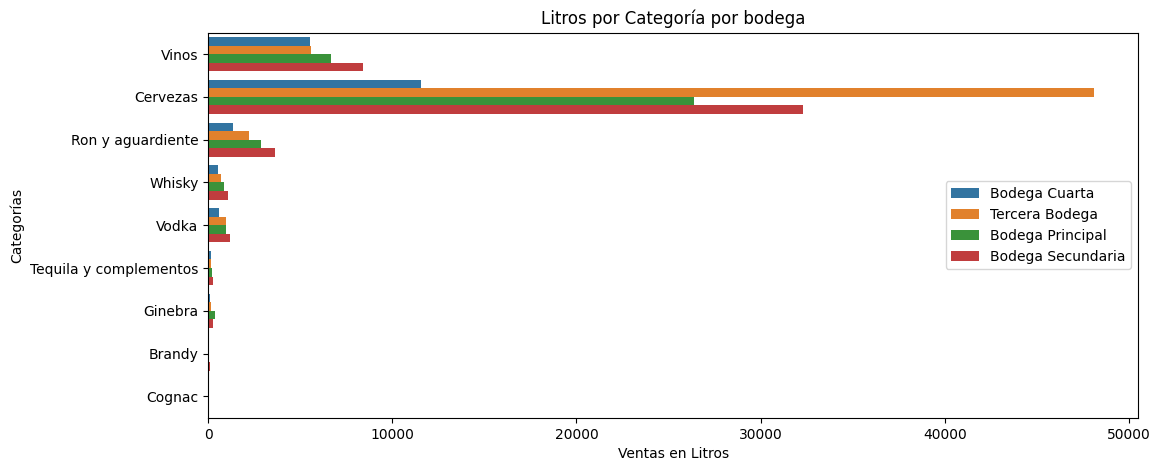

In [70]:
fig, ax = plt.subplots()

fig.set_size_inches(12,5)


ax = sns.barplot(y="Categoría", x="Litros",  data = df_merge_completo, hue=df_merge_completo['NombreBodega'], errorbar=None, estimator="sum", orient="h") 
ax.set_title("Litros por Categoría por bodega")
ax.legend(loc="right")
ax.set(xlabel='Ventas en Litros')
ax.set(ylabel='Categorías')

##ax.set_xlim(1000,10)

plt.show()


In [71]:

##Usando tabla pivote // Tabla de contingencia, se desea visualizar la venta por sucursal por año/mes

df_2020_facturas_Bod4ta =  df_merge_completo[(df_merge_completo['Ano'] == 2020) & (df_merge_completo['MontoSinIVA'] > 0)  & (df_merge_completo['NombreBodega'] == 'Bodega Cuarta')].groupby('NumFactura').agg({'MontoSinIVA' : 'sum'})
df_2020_facturas_Bod3ra =  df_merge_completo[(df_merge_completo['Ano'] == 2020) & (df_merge_completo['MontoSinIVA'] > 0)  & (df_merge_completo['NombreBodega'] == 'Tercera Bodega')].groupby('NumFactura').agg({'MontoSinIVA' : 'sum'})
df_2020_facturas_Bod1ra =  df_merge_completo[(df_merge_completo['Ano'] == 2020) & (df_merge_completo['MontoSinIVA'] > 0)  & (df_merge_completo['NombreBodega'] == 'Bodega Principal')].groupby('NumFactura').agg({'MontoSinIVA' : 'sum'})
df_2020_facturas_Bod2da =  df_merge_completo[(df_merge_completo['Ano'] == 2020) & (df_merge_completo['MontoSinIVA'] > 0)  & (df_merge_completo['NombreBodega'] == 'Bodega Secundaria')].groupby('NumFactura').agg({'MontoSinIVA' : 'sum'})




tablaContingencia =  pd.crosstab(index= [df_merge_completo['Ano'], df_merge_completo['Mes']], columns =  df_merge_completo['NombreBodega'] , values = df_merge_completo['MontoSinIVA'], aggfunc= "sum", margins=True, margins_name='total')

tablaContingencia

NombreBodega  Bodega Cuarta  Bodega Principal  Bodega Secundaria  \
Ano   Mes                                                          
2019  1             9483.51          12773.01           17273.57   
      2            12713.83          23714.82           18660.67   
      3            21388.91          87590.97           21124.73   
      4             7650.51          13864.46           16901.33   
      5             7091.58          14208.83           16699.58   
      6             7753.97          14460.77           19637.79   
      7             6200.30          11593.58           16853.54   
      8             7300.89          11844.54           17035.02   
      9             6402.49          10790.72           16029.24   
      10            7680.86          16873.09           16933.13   
      11            9318.83          20682.38           22097.24   
      12           24063.61          41239.07           48279.55   
2020  1            10678.22          15928.42           16904.74   
      3              130.60             60.00             127.06   
      6            15921.30          22751.24           19807.41   
      7            14585.17          18318.54           19618.71   
      9            21886.53          23988.96           19309.38   
      12           16030.63          29779.54           32688.76   
total             206281.74         390462.94          355981.45   

NombreBodega  Tercera Bodega       total  
Ano   Mes                                 
2019  1             24378.06    63908.15  
      2             27801.50    82890.82  
      3             47721.55   177826.16  
      4             23641.43    62057.73  
      5             18830.42    56830.41  
      6             23054.54    64907.07  
      7             19970.05    54617.47  
      8             22395.38    58575.83  
      9             19615.24    52837.69  
      10            27291.00    68778.08  
      11            34855.87    86954.32  
      12            71248.43   184830.66  
2020  1             30552.98    74064.36  
      3               210.60      528.26  
      6             20435.67    78915.62  
      7             32495.29    85017.71  
      9             35291.17   100476.04  
      12            51708.00   130206.93  
total              531497.18  1484223.31

In [72]:
##Se obtiene la subtabla interna para diciembre 2019
tablaContingencia.loc[(2019,12),:]

NombreBodega
Bodega Cuarta         24063.61
Bodega Principal      41239.07
Bodega Secundaria     48279.55
Tercera Bodega        71248.43
total                184830.66
Name: (2019, 12), dtype: float64

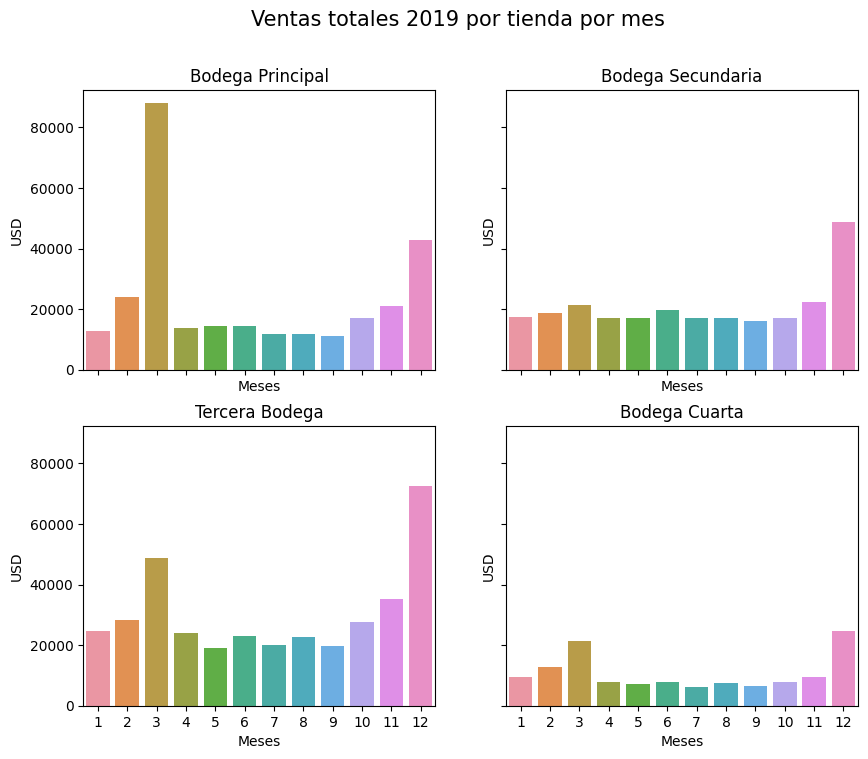

In [73]:
## Subplot, Ventas por pdv a traves del tiempo. 


df_2019_facturas_Bod4ta =  df_merge_completo[(df_merge_completo['Ano'] == 2019) & (df_merge_completo['MontoSinIVA'] > 0)  & (df_merge_completo['NombreBodega'] == 'Bodega Cuarta')].groupby(['Mes']).agg({'MontoSinIVA' : 'sum'})
df_2019_facturas_Bod3ra =  df_merge_completo[(df_merge_completo['Ano'] == 2019) & (df_merge_completo['MontoSinIVA'] > 0)  & (df_merge_completo['NombreBodega'] == 'Tercera Bodega')].groupby(['Mes']).agg({'MontoSinIVA' : 'sum'})
df_2019_facturas_Bod1ra =  df_merge_completo[(df_merge_completo['Ano'] == 2019) & (df_merge_completo['MontoSinIVA'] > 0)  & (df_merge_completo['NombreBodega'] == 'Bodega Principal')].groupby(['Mes']).agg({'MontoSinIVA' : 'sum'})
df_2019_facturas_Bod2da =  df_merge_completo[(df_merge_completo['Ano'] == 2019) & (df_merge_completo['MontoSinIVA'] > 0)  & (df_merge_completo['NombreBodega'] == 'Bodega Secundaria')].groupby(['Mes']).agg({'MontoSinIVA' : 'sum'})


fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

sns.barplot(data = df_2019_facturas_Bod1ra,  x=df_2019_facturas_Bod1ra.index.values, y='MontoSinIVA',  ax=axes[0, 0])
sns.barplot(data = df_2019_facturas_Bod2da,  x=df_2019_facturas_Bod2da.index.values, y='MontoSinIVA',  ax=axes[0, 1])
sns.barplot(data = df_2019_facturas_Bod3ra,  x=df_2019_facturas_Bod3ra.index.values, y='MontoSinIVA',  ax=axes[1, 0])
sns.barplot(data = df_2019_facturas_Bod4ta,  x=df_2019_facturas_Bod4ta.index.values, y='MontoSinIVA',  ax=axes[1, 1])

axes[0, 0].set(xlabel='Meses', ylabel='USD', title='Bodega Principal')
axes[0, 1].set(xlabel='Meses', ylabel='USD', title='Bodega Secundaria')
axes[1, 0].set(xlabel='Meses', ylabel='USD', title='Tercera Bodega')
axes[1, 1].set(xlabel='Meses', ylabel='USD', title='Bodega Cuarta')


fig.suptitle('Ventas totales 2019 por tienda por mes', fontsize=15);

In [74]:
## Boxplot para análisis de precio por categoría de productos

df_merge_completo['Precio']= df_merge_completo['MontoSinIVA']/df_merge_completo['Unidades']


In [75]:
df_merge_completo.head(10)

,Fecha,Hora,idBodega,idProducto,MontoSinIVA,Unidades,NumFactura,idCajero,nombre,NombreBodega,...,Proveedor,Contenido,Litros,ContenidoTotal,Ano,Mes,Dia,Fecha2,DiaSemana,Precio
0,2019-03-01,10,8,10278636,7.70,2,8042000053807,42,Álex Valenzuela,Bodega Cuarta,...,Felipe Motta,1000 Ml,1.000,2.000,2019,3,1,2019-03-01,Viernes,3.85
1,2019-03-01,16,8,11386497,0.98,2,8042000053922,42,Álex Valenzuela,Bodega Cuarta,...,Feduro,355 Ml,0.355,0.710,2019,3,1,2019-03-01,Viernes,0.49
2,2019-03-01,21,8,735295,1.96,2,8033000328873,33,Sergio Carrasco,Bodega Cuarta,...,Feduro,355 Ml,0.355,0.710,2019,3,1,2019-03-01,Viernes,0.98
3,2019-03-01,19,39,9625130,1.26,2,39046000339984,46,Rubén Ortiz,Tercera Bodega,...,Cervecería Nacional,355 Ml,0.355,0.710,2019,3,1,2019-03-01,Viernes,0.63
4,2019-03-01,18,7,904779,0.80,2,7096000032910,96,Mateo Díaz,Bodega Principal,...,Heineken Panamá,355 Ml,0.355,0.710,2019,3,1,2019-03-01,Viernes,0.40
5,2019-03-01,18,7,9625130,1.30,2,7093000077789,93,Hugo González,Bodega Principal,...,Cervecería Nacional,355 Ml,0.355,0.710,2019,3,1,2019-03-01,Viernes,0.65
6,2019-03-01,16,10,10658899,1.95,3,10009000780846,9,Luis Navarro,Bodega Secundaria,...,Cervecería Nacional,355 Ml,0.355,1.065,2019,3,1,2019-03-01,Viernes,0.65
7,2019-03-01,20,10,410737,1.95,3,10052000071991,52,Alejandro Contreras,Bodega Secundaria,...,Cervecería Nacional,355 Ml,0.355,1.065,2019,3,1,2019-03-01,Viernes,0.65
8,2019-03-01,15,8,503012,26.85,3,8034000476283,34,Nicolás Gómez,Bodega Cuarta,...,Felipe Motta,750 Ml,0.750,2.250,2019,3,1,2019-03-01,Viernes,8.95
9,2019-03-01,20,39,11386497,1.47,3,39059000021317,59,Eric Figueroa,Tercera Bodega,...,Feduro,355 Ml,0.355,1.065,2019,3,1,2019-03-01,Viernes,0.49


Text(0.5, 1.0, 'Distribución de precio promedio por categoría')

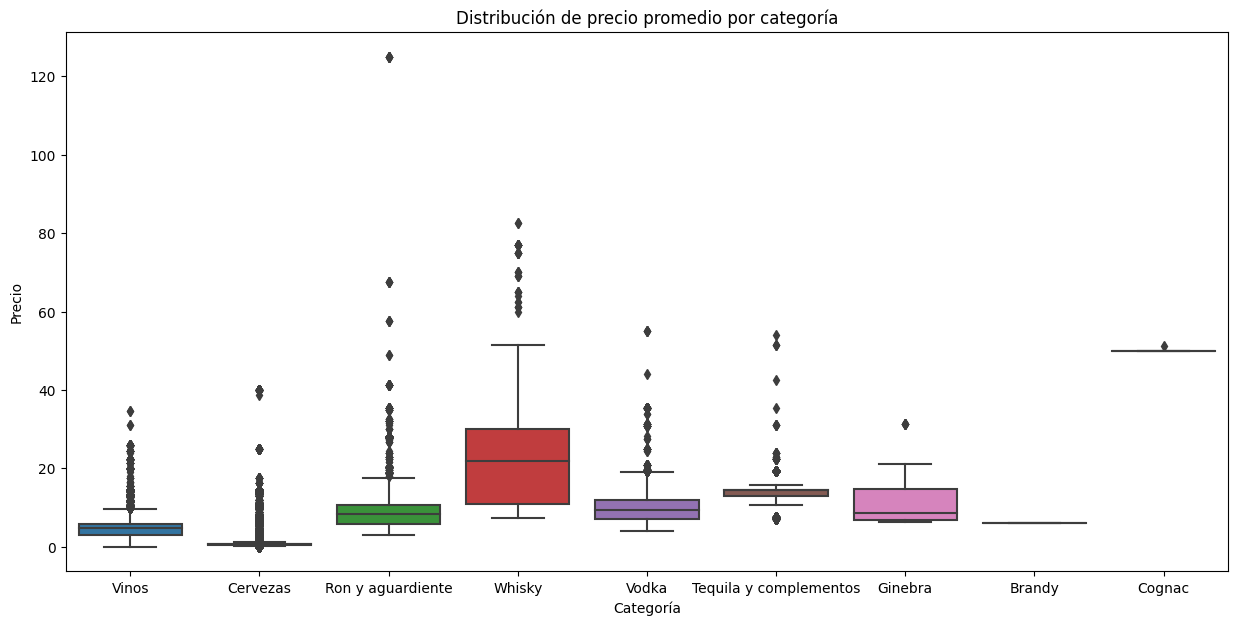

In [76]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_merge_completo, x='Categoría', y='Precio') 
plt.title("Distribución de precio promedio por categoría")

In [77]:
##Analizaremos ahora a traves del diagrama de violin, la distribucion y densisdad de las 3 marcas de whisky mas vendidas

df_merge_Wiskey = df_merge_completo[df_merge_completo["Categoría"] == "Whisky"]

df_merge_Wiskey.groupby(['Marca']).agg({'MontoSinIVA' : 'sum'}).sort_values('MontoSinIVA', ascending= False )



,MontoSinIVA
Marca,
Old Parr,37641.62
Chivas Regal,16455.30
Buchanans,14277.83
Johnnie Walker,9575.62
Black & White,6934.36
Chanceler,3371.32
Jack Daniels,3300.42
Passport,1020.98
The Macallan,507.85


In [78]:
Top3Marcas = ['Old Parr','Chivas Regal','Buchanans']

df_merge_Wiskey = df_merge_Wiskey[df_merge_Wiskey["Marca"].isin(Top3Marcas)]

df_merge_Wiskey.head()

,Fecha,Hora,idBodega,idProducto,MontoSinIVA,Unidades,NumFactura,idCajero,nombre,NombreBodega,...,Proveedor,Contenido,Litros,ContenidoTotal,Ano,Mes,Dia,Fecha2,DiaSemana,Precio
715,2019-03-01,13,10,12028061,29.98,1,10040000639366,40,Luka Carvajal,Bodega Secundaria,...,Global Brands,750 Ml,0.75,0.75,2019,3,1,2019-03-01,Viernes,29.98
764,2019-03-01,19,8,2039428,38.95,1,8034000476392,34,Nicolás Gómez,Bodega Cuarta,...,Swg,1000 Ml,1.00,1.00,2019,3,1,2019-03-01,Viernes,38.95
791,2019-03-01,21,7,8123530,45.85,1,7079000508291,79,Bruno Castillo,Bodega Principal,...,Global Brands,750 Ml,0.75,0.75,2019,3,1,2019-03-01,Viernes,45.85
1517,2019-03-01,12,10,775018,29.98,1,10011000535037,11,Miguel Reyes,Bodega Secundaria,...,Global Brands,750 Ml,0.75,0.75,2019,3,1,2019-03-01,Viernes,29.98
1675,2019-03-03,12,7,9719929,39.75,1,7041000505189,41,Adrián Morales,Bodega Principal,...,Global Brands,1000 Ml,1.00,1.00,2019,3,3,2019-03-03,Domingo,39.75


<AxesSubplot: xlabel='Marca', ylabel='Precio'>

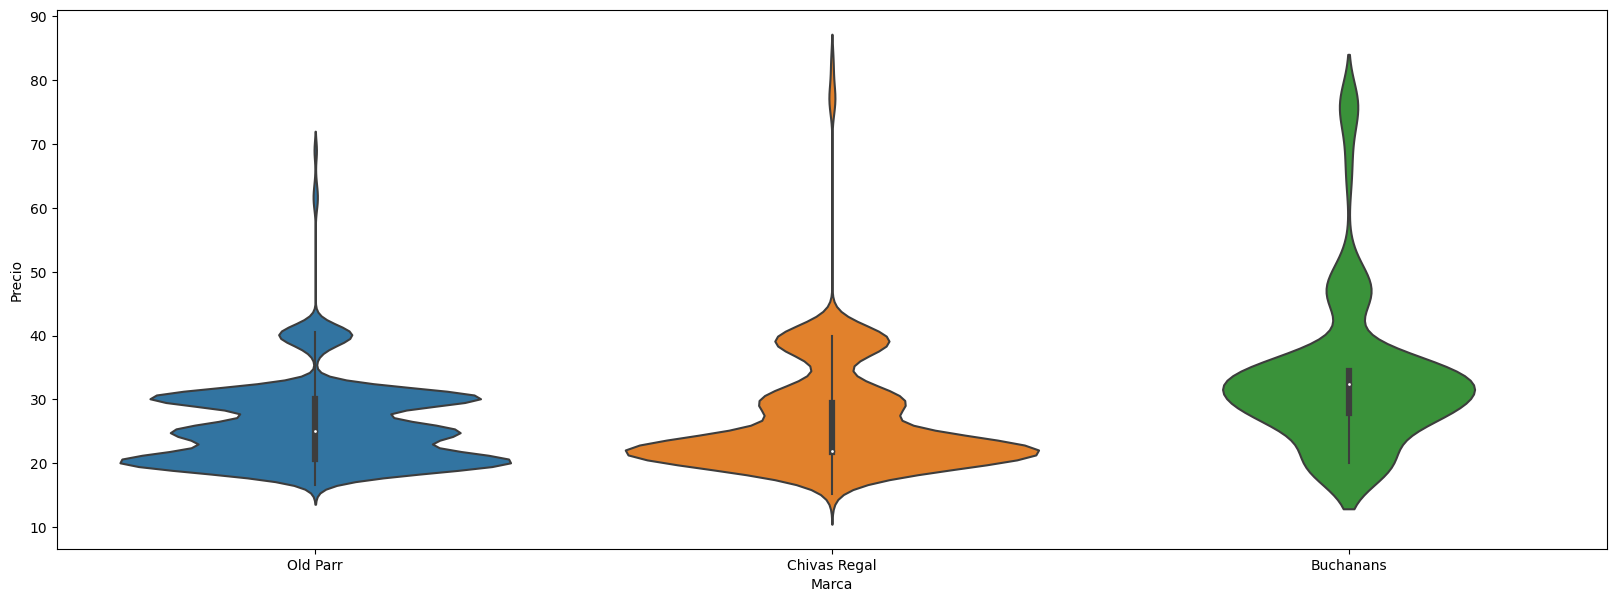

In [79]:
plt.figure(figsize=(20, 7))
sns.violinplot(data=df_merge_Wiskey, x='Marca', y='Precio')

In [80]:
## Se evaluará Coeficiente de correlación de Pearson (que requiere 2 variables numéricas) utilizando el dia del mes contra el volúmen de ventas en USD

DF_CorrelacionDiaVenta = df_merge_completo[(df_merge_completo['Categoría'] == 'Cervezas')].groupby(['Dia']).agg({'MontoSinIVA' : 'sum'})

DF_CorrelacionDiaVenta = DF_CorrelacionDiaVenta.reset_index()

DF_CorrelacionDiaVenta.head()

,Dia,MontoSinIVA
0,1,49728.44
1,2,47017.05
2,3,53764.96
3,4,53583.75
4,5,47769.13


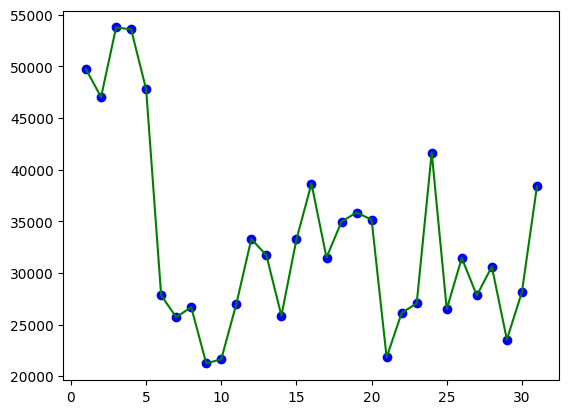

In [81]:
arr_1_1 = DF_CorrelacionDiaVenta['Dia'].to_numpy()
arr_1_2 = DF_CorrelacionDiaVenta['MontoSinIVA'].to_numpy()

plt.scatter(arr_1_1, arr_1_2, c='blue') 
plt.plot(arr_1_1, arr_1_2, c='green') 


In [82]:
Correlacion = DF_CorrelacionDiaVenta['Dia'].corr(DF_CorrelacionDiaVenta['MontoSinIVA'], method='pearson')

print(f'Correlación entre las variables día del mes y venta en USD, para la categoría de Cervezas es: {Correlacion}')


Correlación entre las variables día del mes y venta en USD, para la categoría de Cervezas es: -0.42770453188125657


A nivel Grafico o numerico no pareciera haber una relación, pero a nivel comercial sí, correspondiente a que en efecto, mientras mas se encuentra la fecha de pago, mayor es la venta, generandose los picos apropiados alrededor del 24( pago a empleados publicos), final/inicio de mes, y mediados de dicho mes. 

In [83]:
df_merge_completo.corr(method="pearson")

##Matriz de correlaciones

C:\Users\ghenriquez\AppData\Local\Temp\ipykernel_34652\2271805892.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_merge_completo.corr(method="pearson")


,Hora,idBodega,idProducto,MontoSinIVA,Unidades,NumFactura,idCajero,Latitud,Longitud,Litros,ContenidoTotal,Ano,Mes,Dia,Precio
Hora,1.000000,-0.070877,0.000978,-0.004769,-0.003109,-0.071080,-0.120735,0.112640,0.136834,-0.012472,-0.003258,-0.018475,0.058507,0.032113,-0.031295
idBodega,-0.070877,1.000000,0.078108,-0.001602,0.004127,0.999998,0.119087,0.089330,-0.347294,-0.019703,0.003905,0.012927,0.048526,0.002358,-0.092647
idProducto,0.000978,0.078108,1.000000,-0.013212,-0.001791,0.078183,0.050633,-0.002001,-0.035768,-0.007494,-0.002242,0.529014,0.277205,-0.069109,-0.211609
MontoSinIVA,-0.004769,-0.001602,-0.013212,1.000000,0.997477,-0.001591,0.006075,-0.010110,-0.008815,0.014888,0.998055,-0.018283,-0.016785,0.001425,0.042054
Unidades,-0.003109,0.004127,-0.001791,0.997477,1.000000,0.004139,0.007194,-0.006970,-0.008364,-0.008281,0.999580,-0.013343,-0.011669,-0.001707,-0.011506
NumFactura,-0.071080,0.999998,0.078183,-0.001591,0.004139,1.000000,0.120867,0.088080,-0.348475,-0.019682,0.003917,0.013001,0.048516,0.002312,-0.092644
idCajero,-0.120735,0.119087,0.050633,0.006075,0.007194,0.120867,1.000000,-0.681010,-0.695439,0.009114,0.007196,0.042608,0.000424,-0.025287,-0.009895
Latitud,0.112640,0.089330,-0.002001,-0.010110,-0.006970,0.088080,-0.681010,1.000000,0.902950,-0.035082,-0.007263,-0.012699,0.036234,0.017941,-0.050749
Longitud,0.136834,-0.347294,-0.035768,-0.008815,-0.008364,-0.348475,-0.695439,0.902950,1.000000,-0.024438,-0.008544,-0.017416,0.013042,0.015906,-0.007419
Litros,-0.012472,-0.019703,-0.007494,0.014888,-0.008281,-0.019682,0.009114,-0.035082,-0.024438,1.000000,0.006275,-0.030975,-0.026161,0.027318,0.422085


C:\Users\ghenriquez\AppData\Local\Temp\ipykernel_34652\392163237.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df_merge_completo.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)


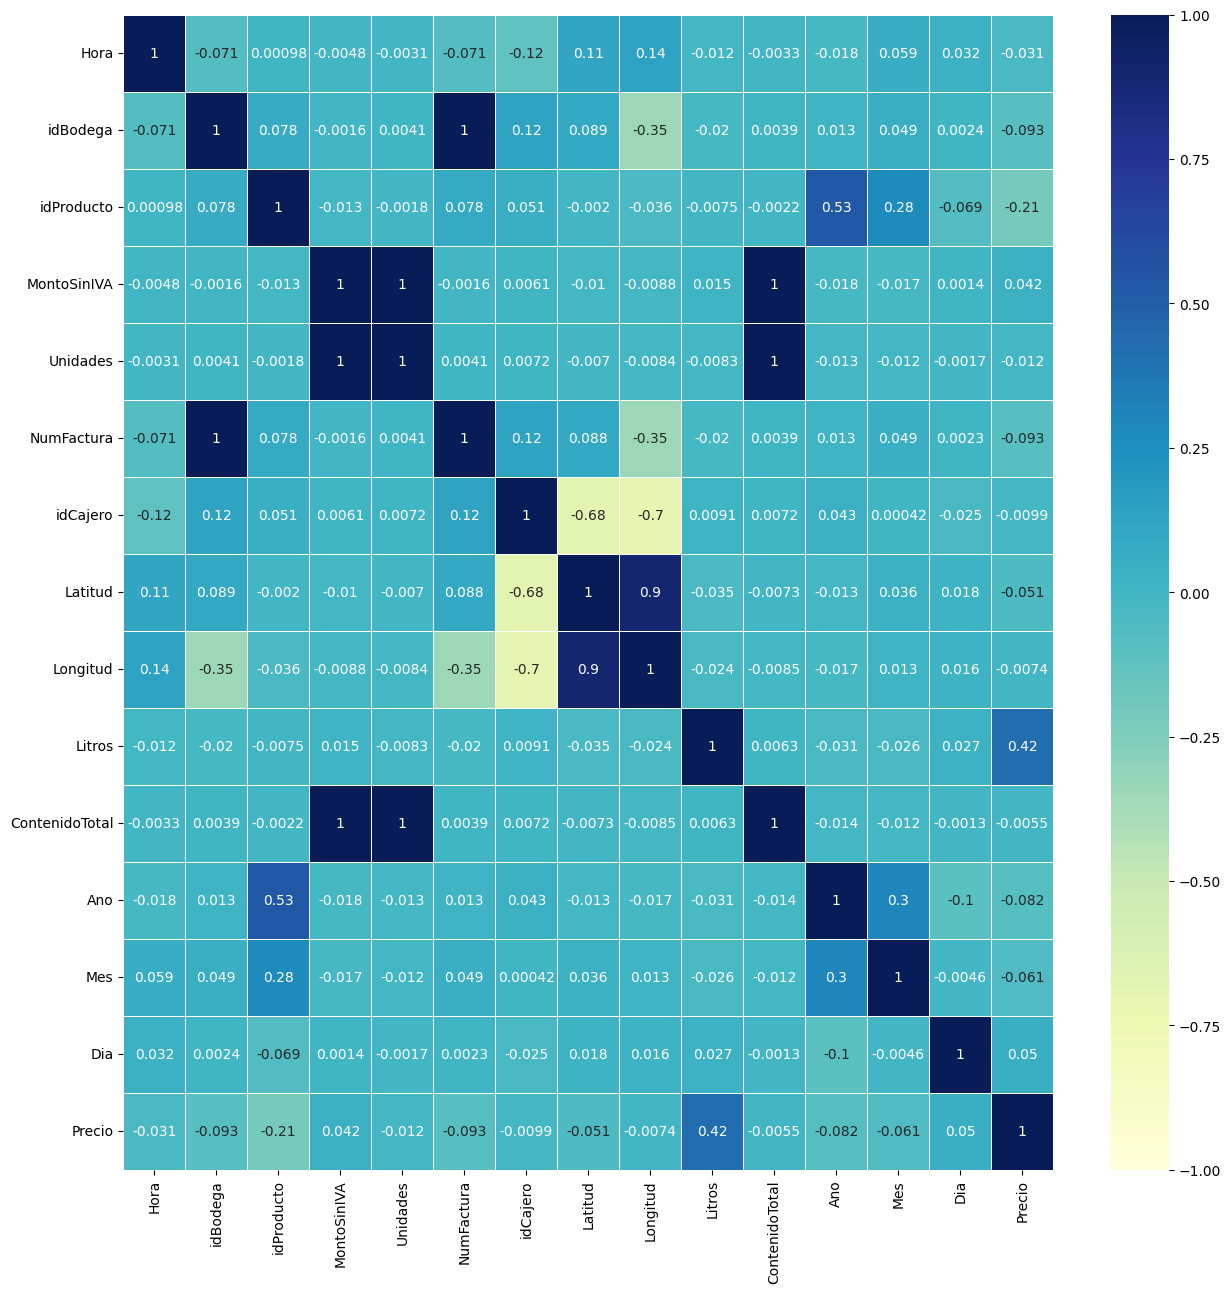

In [84]:
##plt.matshow(df_merge_completo.corr(method="pearson"))

##Graficamente la matriz de correlaciones
plt.figure(figsize=(15, 15))
ax = sns.heatmap(df_merge_completo.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)

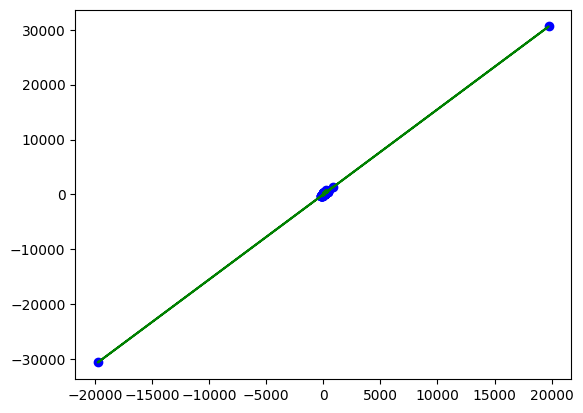

In [85]:
## Una correlación mas directa, se puede graficar a traves de las ventas en litros vs venta en USD

arr_2_1 = df_merge_completo['ContenidoTotal'].to_numpy()
arr_2_2 = df_merge_completo['MontoSinIVA'].to_numpy()


plt.scatter(arr_2_1, arr_2_2, c='blue') 
plt.plot(arr_2_1, arr_2_2, c='green')



In [86]:
Correlacion = df_merge_completo['ContenidoTotal'].corr(df_merge_completo['MontoSinIVA'], method='pearson')

print(f'Correlación entre las Variables de contenido y Dinero para todo el dataframe: {Correlacion}')

##Comercialmente hablando, la correlacion no es perfecta por las promociones, en las cuales se regala un producto (monto de venta cero), pero el producto si posee contenido

Correlación entre las Variables de contenido y Dinero para todo el dataframe: 0.9980548143052353


<AxesSubplot: xlabel='Precio', ylabel='Litros'>

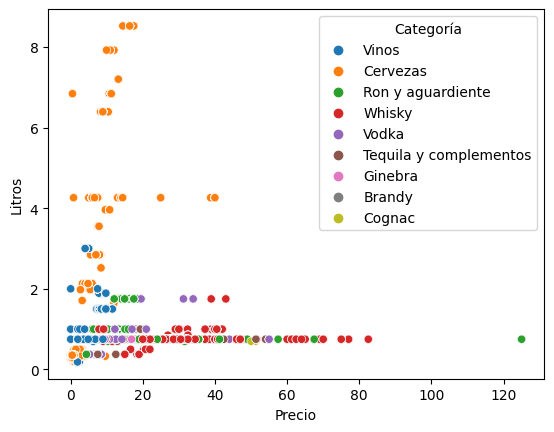

In [87]:
#########
## Ahora se iniciará un analisis con scatterplot utilizando las variables de PRECIO y Litros 

sns.scatterplot(x=df_merge_completo['Precio'], y=df_merge_completo['Litros'], hue=df_merge_completo['Categoría'])

In [88]:
df_merge_completo['Precio'].corr(df_merge_completo['Litros'])

0.42208532603382526

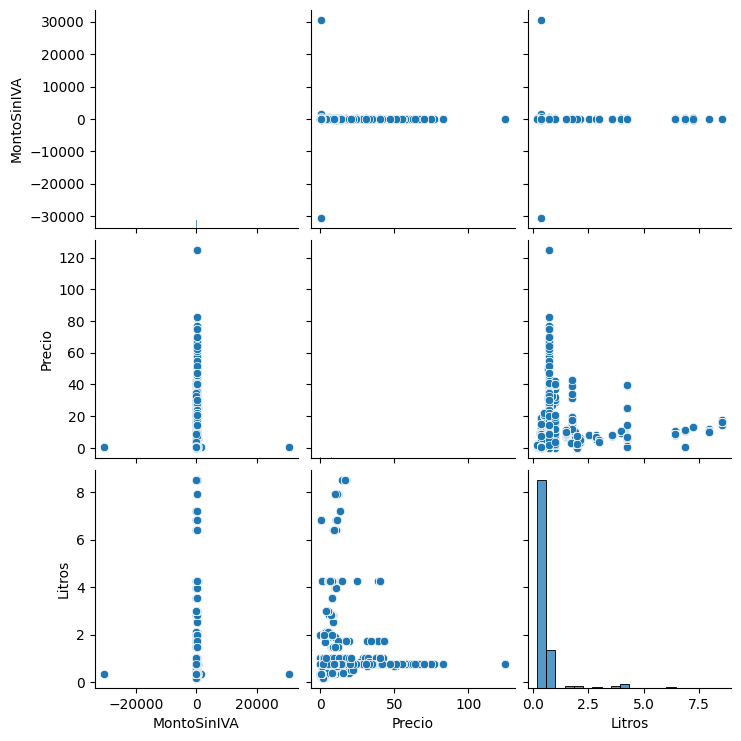

In [89]:
##ahora generaremos el grafico tipo pairplot
##Sin embargo, vamos primero a limpiar 


sns.pairplot(df_merge_completo, vars=["MontoSinIVA",'Precio','Litros'])
##Demora 6 minutos

<AxesSubplot: xlabel='ContenidoTotal', ylabel='MontoSinIVA'>

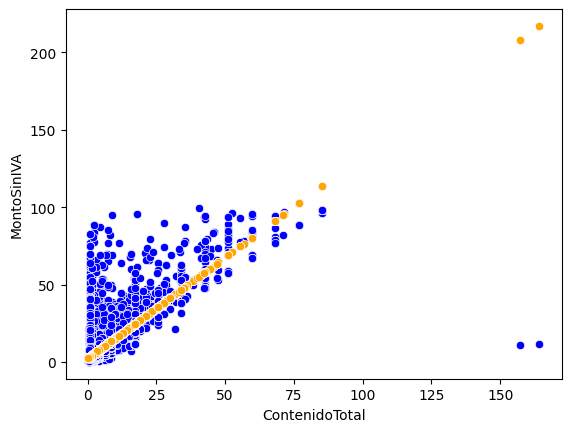

In [90]:
##Regresion Lineal Simple
##Tomando en cuenta la relacion que hay entre el contenido total del registro en litros y el monto pagado en USD, 
## una correlación que no fue de 1, sino .99, vamos a encontrar ese factor a traves de la regresión lineal.

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

df_filtrado = df_merge_completo[ (df_merge_completo['MontoSinIVA'] > 0) & (df_merge_completo['MontoSinIVA'] < 100)]

arr_2_1 = df_filtrado['ContenidoTotal']
arr_2_2 = df_filtrado['MontoSinIVA']

lr.fit(arr_2_1.to_frame(), arr_2_2)

y_predict = lr.predict(arr_2_1.to_frame())

sns.scatterplot(x=arr_2_1, y= arr_2_2, color = 'blue' ) # los puntos azules corresponde a mis datos
sns.scatterplot(x=arr_2_1, y= y_predict, color = "orange")

In [91]:
df_pivot = df_merge_completo[ df_merge_completo['MontoSinIVA'] > 0 ].pivot_table (index="NumFactura", columns='Categoría',values=['MontoSinIVA'], aggfunc='sum' )##.reset_index()

In [92]:
##Existen 9 caterias, queremos los registros con por lo menos 2 categorías

df_pivot = df_pivot[df_pivot.isnull().sum(axis=1) < 8]

In [93]:
df_pivot

MontoSinIVA                                            \
Categoría           Brandy Cervezas Cognac Ginebra Ron y aguardiente   
NumFactura                                                             
7009000799064          NaN     2.50    NaN     NaN              4.25   
7009000805306          NaN     3.30    NaN     NaN               NaN   
7009000805374          NaN     3.90    NaN     NaN              7.75   
7009000807106          NaN     3.90    NaN     NaN               NaN   
7009000809086          NaN     2.94    NaN     NaN               NaN   
...                    ...      ...    ...     ...               ...   
39068000031841         NaN    26.40    NaN     NaN               NaN   
39068000031873         NaN    33.12    NaN     NaN              8.45   
39068000032026         NaN     4.14    NaN     NaN               NaN   
39068000032196         NaN     0.65    NaN     NaN               NaN   
39068000032498         NaN     1.30    NaN     NaN               NaN   

                                                           
Categoría      Tequila y complementos Vinos  Vodka Whisky  
NumFactura                                                 
7009000799064                     NaN   NaN    NaN    NaN  
7009000805306                     NaN   NaN    NaN   29.5  
7009000805374                     NaN   NaN    NaN    NaN  
7009000807106                     NaN  7.45    NaN    NaN  
7009000809086                     NaN  3.10    NaN    NaN  
...                               ...   ...    ...    ...  
39068000031841                    NaN  5.60    NaN    NaN  
39068000031873                    NaN   NaN    NaN    NaN  
39068000032026                    NaN   NaN  25.34    9.5  
39068000032196                    NaN  2.30    NaN    NaN  
39068000032498                    NaN  1.89    NaN    NaN  

[7956 rows x 9 columns]

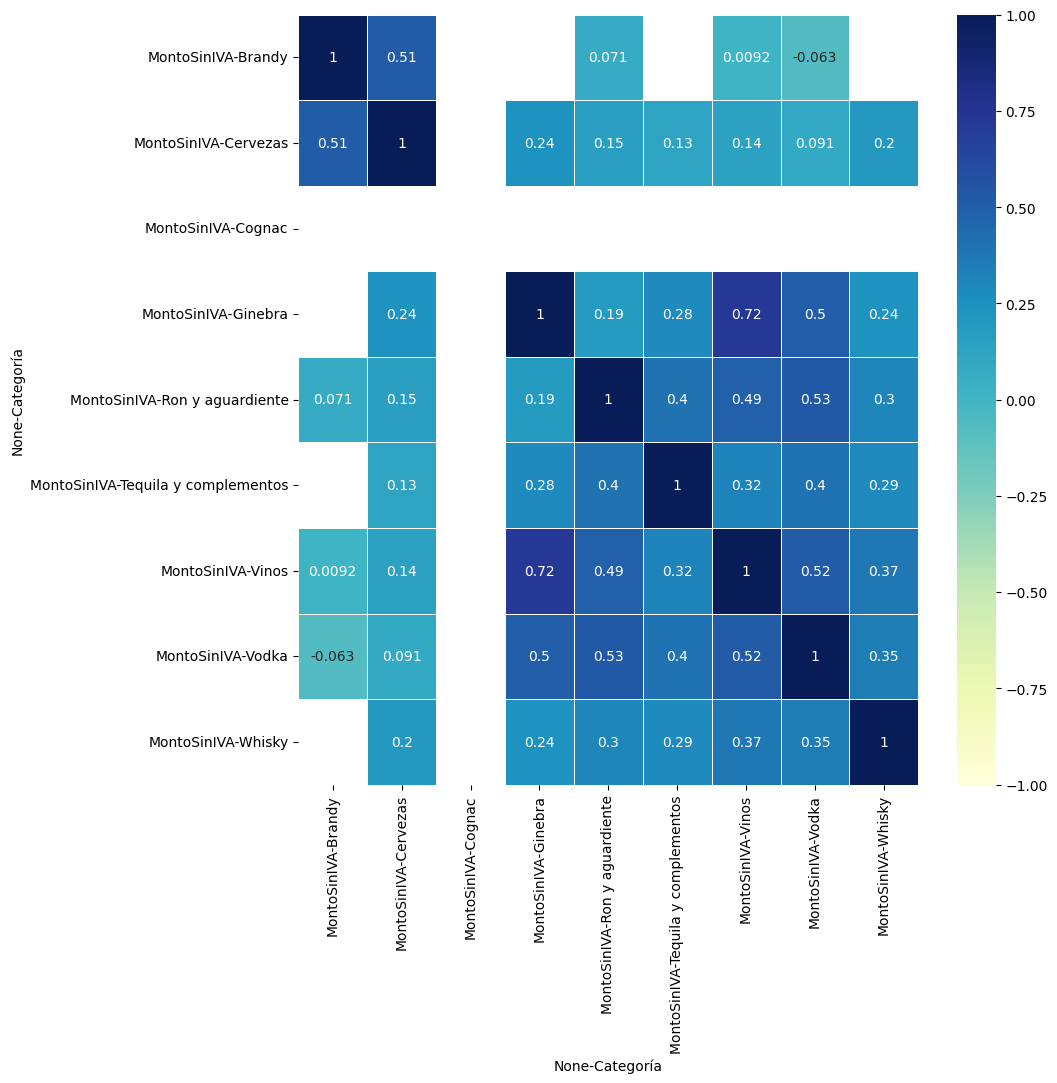

In [94]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(df_pivot.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)

##Basado en la relacion mas alta (Vinos y Ginebra) se harán los siguientes analisis.

<AxesSubplot: xlabel="('MontoSinIVA', 'Vinos')", ylabel="('MontoSinIVA', 'Ginebra')">

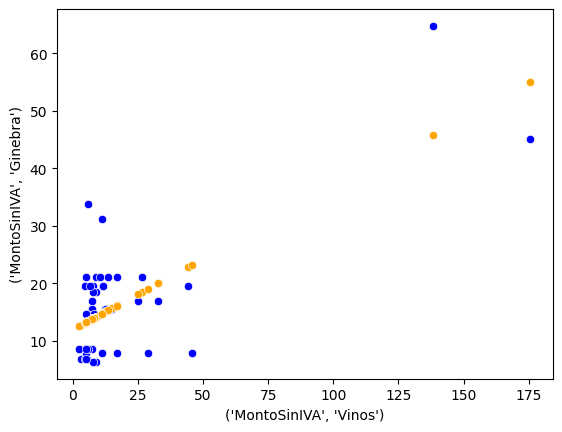

In [95]:
##ahora filtramos los registros que solo tengan Vinos y Ginebra

df_pivot_Vinos_Ginebra = df_pivot[(df_pivot['MontoSinIVA','Vinos'].isnull() == False) & (df_pivot['MontoSinIVA','Ginebra'].isnull() == False)]

lr = LinearRegression()



arr_2_1 = df_pivot_Vinos_Ginebra['MontoSinIVA','Vinos']
arr_2_2 = df_pivot_Vinos_Ginebra['MontoSinIVA','Ginebra']

lr.fit(arr_2_1.to_frame(), arr_2_2)

y_predict = lr.predict(arr_2_1.to_frame())

sns.scatterplot(x=arr_2_1, y= arr_2_2, color = 'blue' )         # los puntos azules corresponde a mis datos
sns.scatterplot(x=arr_2_1, y= y_predict, color = "orange")



In [96]:
intercept = lr.intercept_ # La ordenada al origen
coefficient = lr.coef_[0] # La pendiente

## Valores de la formula de regresion lineal simple
print(f'y = {coefficient} * x + {intercept}')

##R^2 - coeficiente de determinación
print(f'R2: {lr.score(arr_2_1.to_frame(), arr_2_2)}')


y = 0.24477424649313465 * x + 11.97816499435029
R2: 0.5221676999936506


In [97]:
##Muestreo  - Bootstrap
## se aplicará el proceso para evaluar el precio. 
## comercialmente no tedrá sentido.  

df_evaluacion = df_merge_completo

#se toma una muestra del 10%
df_evaluacion['Precio'].sample(frac=0.1, replace=False)



47304     0.41
77997     7.75
237183    0.58
196550    0.45
301357    2.30
          ... 
174415    5.00
71842     0.58
91363     3.85
143823    0.65
71476     0.41
Name: Precio, Length: 30848, dtype: float64

In [98]:
##Bootstrap

df_evaluacion2 = df_evaluacion['Precio']
means = []

for i in range(100_000):
    mi_muestra = df_evaluacion2.sample(n=50, replace=True) 
    means.append(mi_muestra.mean()) 
    
serie_means = pd.Series(means)



In [99]:
len(means)

100000

In [100]:
serie_means

0        1.8876
1        2.4644
2        2.4322
3        1.5222
4        2.1204
          ...  
99995    2.0726
99996    2.7304
99997    2.1146
99998    2.1994
99999    4.0602
Length: 100000, dtype: float64

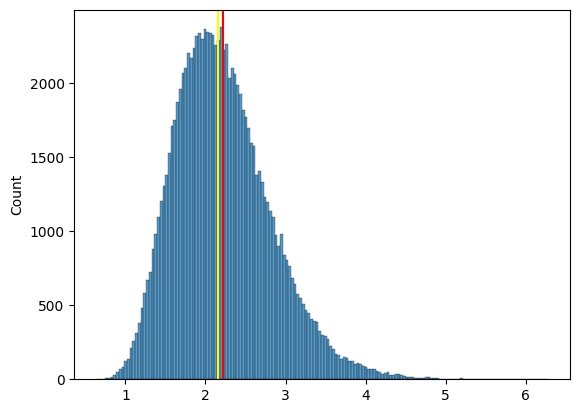

In [101]:
sns.histplot(serie_means, kde=False)

##plt.axvline(df_evaluacion['Precio'].mean(), c='magenta')
##plt.axvline(df_evaluacion['Precio'].median(), c='black')

plt.axvline(serie_means.mean(), c='red')
plt.axvline(serie_means.median(), c='yellow')

In [102]:
print(f'skew: {serie_means.skew()}')
print(f'Kurtosis: {serie_means.kurtosis()} \n ')

print(f'Error estandar: {serie_means.std()} \n')

print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()} \n')

print(f'el cociente es: {serie_means.std() / (serie_means.max() - serie_means.min())} ')

skew: 0.7239557713052776
Kurtosis: 0.9456507417547599 
 
Error estandar: 0.6067504919697276 

Valor mínimo: 0.6438000000000001
Valor máximo: 6.2784
Rango: 5.634600000000001 

el cociente es: 0.10768297518363816 


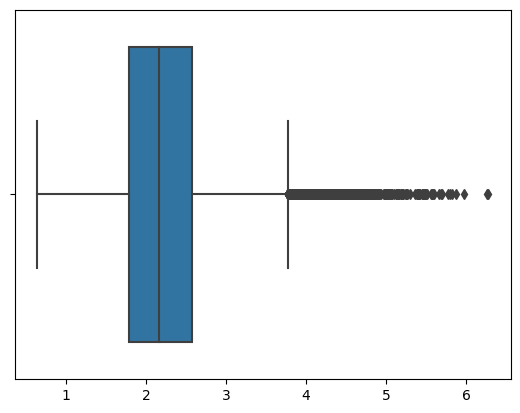

In [103]:
sns.boxplot(x=serie_means);

In [104]:
##como vemos graficamente hay muchos outlayers en la parte superior, por lo que aplicaremos un intervalo de confianza del 90%

limite_inferior = serie_means.quantile(0.05)
limite_superior = serie_means.quantile(0.95)

tmp = df_evaluacion['Precio']

print(f'Intervalo de 90% confianza de la media: {limite_inferior} < {tmp.mean()} < {limite_superior}')

mean_of_intervals = ((tmp.mean() - limite_inferior) + (limite_superior - tmp.mean())) / 2

print(f'Intervalo de 90% confianza de la media: {tmp.mean()} +/- {mean_of_intervals}')

Intervalo de 90% confianza de la media: 1.359 < 2.2241887130080173 < 3.3168099999999985
Intervalo de 90% confianza de la media: 2.2241887130080173 +/- 0.9789049999999992


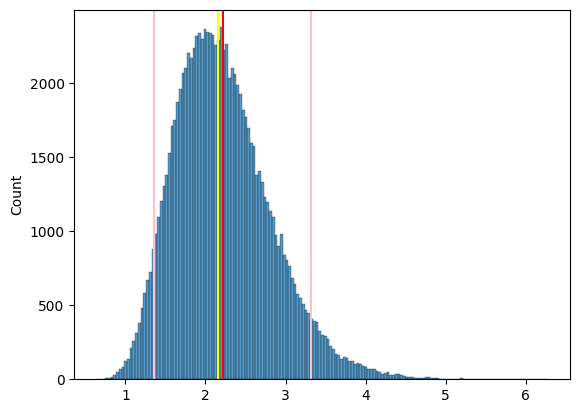

In [105]:
sns.histplot(serie_means, kde=False)

##plt.axvline(df_evaluacion['Precio'].mean(), c='magenta')
##plt.axvline(df_evaluacion['Precio'].median(), c='black')

plt.axvline(serie_means.mean(), c='red')
plt.axvline(serie_means.median(), c='yellow')

##limites de confianza media

plt.axvline(limite_inferior, c='pink')
plt.axvline(limite_superior, c='pink')

In [106]:
##Treemaps - Evaluación del arbol: Categoría, Fabricante Marca de las ventas por producto

import plotly.express as px

fig = px.treemap(df_merge_completo, path=['Categoría', 'Proveedor', 'Marca'], values='MontoSinIVA')
fig.show()

Text(0.5, 0.98, 'Variación del precio promedio por sucursal por cerveza mensual 2019')

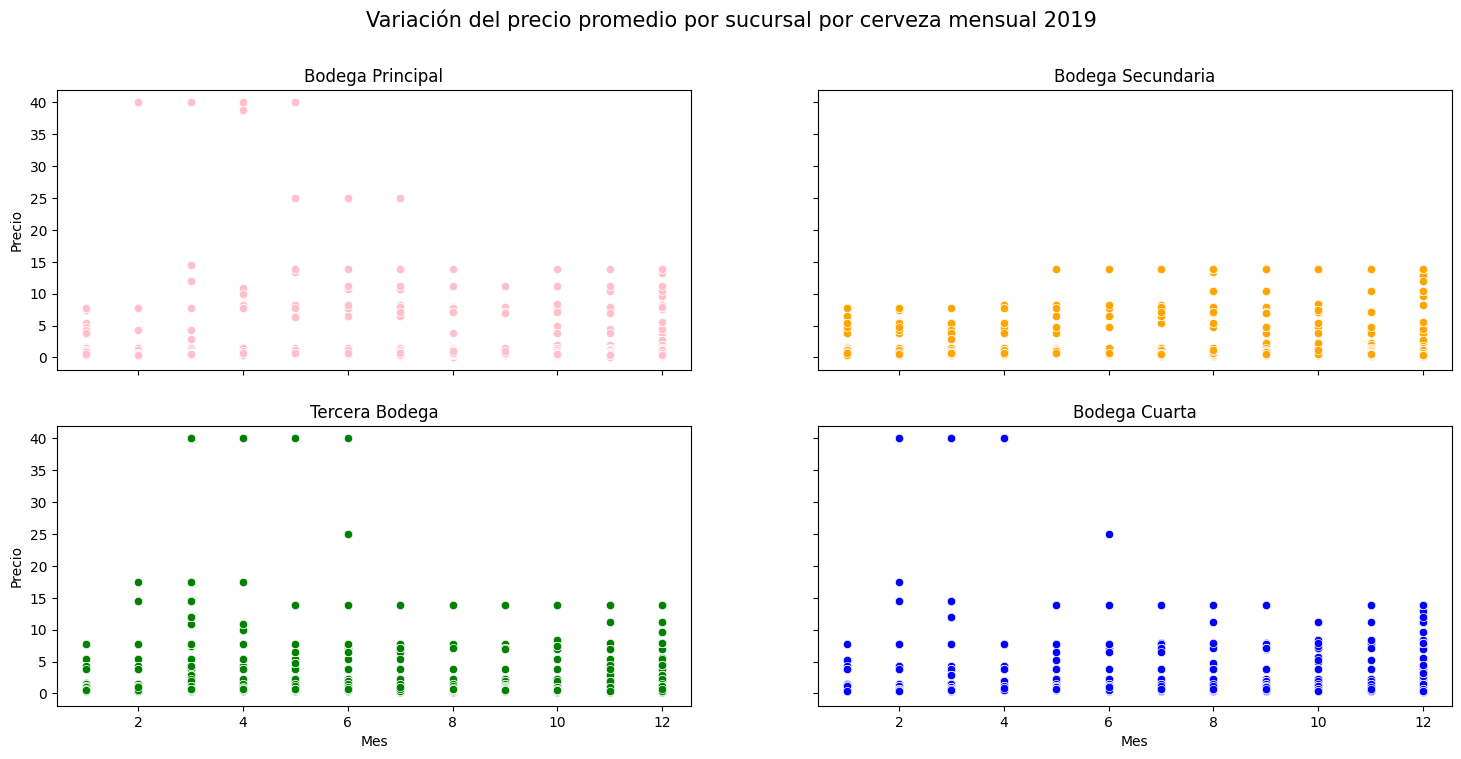

In [107]:
## Scatter plot condicional de la variación del precio promedio por sucursal por litro de cerveza mensual 2019


DF_Cervezas_2019 = df_merge_completo[(df_merge_completo['Categoría'] == 'Cervezas') & (df_merge_completo['Ano'] == 2019) & (df_merge_completo['MontoSinIVA'] > 0 )]

DF_Cervezas_2019 = DF_Cervezas_2019[["Mes",'NombreBodega','Precio']]



df_2019_facturas_Bod4ta =  DF_Cervezas_2019[(DF_Cervezas_2019['NombreBodega'] == 'Bodega Cuarta')]
df_2019_facturas_Bod3ra =  DF_Cervezas_2019[(DF_Cervezas_2019['NombreBodega'] == 'Tercera Bodega')]
df_2019_facturas_Bod1ra =  DF_Cervezas_2019[(DF_Cervezas_2019['NombreBodega'] == 'Bodega Principal')]
df_2019_facturas_Bod2da =  DF_Cervezas_2019[(DF_Cervezas_2019['NombreBodega'] == 'Bodega Secundaria')]

fig = plt.figure(figsize=(18, 8))
axes = fig.subplots(2, 2, sharex=True, sharey=True)

sns.scatterplot(y= df_2019_facturas_Bod4ta["Precio"],  x = df_2019_facturas_Bod4ta["Mes"], ax= axes[1,1], color = 'blue')
sns.scatterplot( y= df_2019_facturas_Bod3ra["Precio"],  x = df_2019_facturas_Bod3ra["Mes"], ax= axes[1,0], color = 'green')
sns.scatterplot( y= df_2019_facturas_Bod1ra["Precio"],  x = df_2019_facturas_Bod1ra["Mes"], ax= axes[0,0], color = 'pink')
sns.scatterplot(y= df_2019_facturas_Bod2da["Precio"],  x = df_2019_facturas_Bod2da["Mes"], ax= axes[0,1], color = 'orange')

#Le pongo título a las subgraficas
axes[0, 0].set_title('Bodega Principal')
axes[0, 1].set_title('Bodega Secundaria')
axes[1, 0].set_title('Tercera Bodega')
axes[1, 1].set_title('Bodega Cuarta')


fig.suptitle("Variación del precio promedio por sucursal por cerveza mensual 2019", fontsize=15)




<AxesSubplot: xlabel='Unidades', ylabel='MontoSinIVA'>

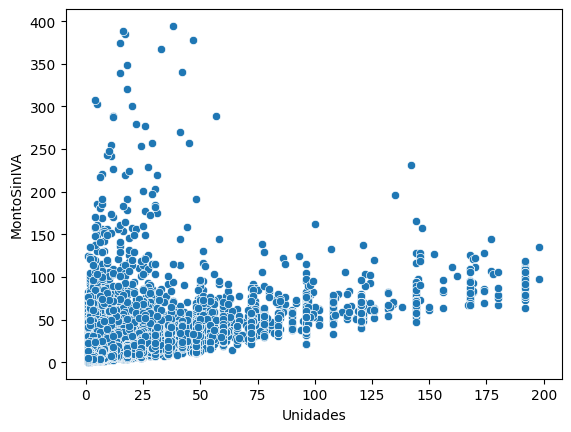

In [108]:
##binnings
##Para este tema definiremos el dataset en factura agrupada por monto de venta y cantidad de productos (unidades originales)

df_grouped = df_merge_completo.groupby('NumFactura')[['Unidades', 'MontoSinIVA']].sum()

df_grouped = df_grouped[(df_grouped['Unidades'] >0) & (df_grouped['Unidades'] < 200) & (df_grouped['MontoSinIVA'] >0) & (df_grouped['MontoSinIVA'] < 400) ]

sns.scatterplot(x = df_grouped['Unidades'], y = df_grouped['MontoSinIVA'])

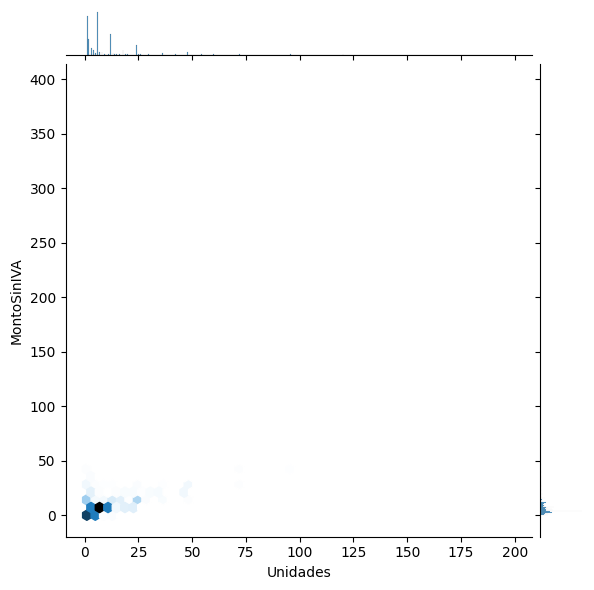

In [109]:
sns.jointplot(x='Unidades', y='MontoSinIVA', data=df_grouped, kind='hex', ratio=9)

In [110]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [111]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [112]:
##uso de georreferenciación
from geopy.geocoders import ArcGIS
nom=ArcGIS()


##nom.geocode("Panama,Panama")
##Location(Panamá, (8.939604460000055, -79.97292613699994, 0.0))



In [219]:
df_posiciones = df_merge_completo.groupby('NombreBodega')[['Latitud', 'Longitud']].max()

df_posiciones = df_posiciones.reset_index()

df_posiciones['Longitud'][0]

df_posiciones

,NombreBodega,Latitud,Longitud
0,Bodega Cuarta,7.964837,-80.431418
1,Bodega Principal,7.964837,-80.431418
2,Bodega Secundaria,9.051577,-79.450947
3,Tercera Bodega,8.496936,-80.334014


In [221]:
df_posiciones['Longitud'][0] = -79.88468
df_posiciones['Latitud'][0] = 9.34523

C:\Users\ghenriquez\AppData\Local\Temp\ipykernel_34652\3272280148.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ghenriquez\AppData\Local\Temp\ipykernel_34652\3272280148.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [222]:
df_posiciones

,NombreBodega,Latitud,Longitud
0,Bodega Cuarta,9.345230,-79.884680
1,Bodega Principal,7.964837,-80.431418
2,Bodega Secundaria,9.051577,-79.450947
3,Tercera Bodega,8.496936,-80.334014


In [223]:
import folium

map_new=folium.Map()

list_coor=df_posiciones[['NombreBodega','Latitud', 'Longitud']].values.tolist()


map_new=folium.Map(location=[8.939604460000055,-79.97292613699994],zoom_start=7,width=700,height=350)
for i in list_coor:
    map_new.add_child(folium.Marker(location=[i[1],i[2]],
                                popup=i[0],icon=folium.Icon(color='green')))


map_new

In [116]:
##Pruebas AB

## Se utilizará la venta de Cervezas, calculo de la probabilidad de que la compra sea de cervezas. 

PruebasAB= df_merge_completo.groupby(by=['Categoría']).agg({ "NumFactura" : "nunique" } )
PruebasAB.head(5)

,NumFactura
Categoría,
Brandy,250
Cervezas,131626
Cognac,5
Ginebra,889
Ron y aguardiente,11029


In [117]:
total = df_merge_completo.agg({ "NumFactura" : ["nunique"] } )

total

,NumFactura
nunique,168334


In [118]:
PruebasAB["No Conversion"] = (168334 - PruebasAB['NumFactura'])

PruebasAB

,NumFactura,No Conversion
Categoría,,
Brandy,250,168084
Cervezas,131626,36708
Cognac,5,168329
Ginebra,889,167445
Ron y aguardiente,11029,157305
Tequila y complementos,994,167340
Vinos,24521,143813
Vodka,4302,164032
Whisky,3481,164853


In [119]:
PruebasAB['success rate'] = PruebasAB['NumFactura'] / (PruebasAB['NumFactura'] + PruebasAB['No Conversion'])

PruebasAB.rename(columns = {"NumFactura" : "conversion"}, inplace = True)



In [120]:
CategoríasAnalizar = ["Ron y aguardiente", "Vinos"]

PruebasAB= PruebasAB[PruebasAB.index.isin(CategoríasAnalizar)] 

PruebasAB

,conversion,No Conversion,success rate
Categoría,,,
Ron y aguardiente,11029,157305,0.065519
Vinos,24521,143813,0.145669


In [121]:
diferencia_en_proporcion = 1 - (PruebasAB.loc['Ron y aguardiente']['success rate'] / PruebasAB.loc['Vinos']['success rate'])
diferencia_en_porcentaje = diferencia_en_proporcion * 100

print(f'La venta de vinos fue {diferencia_en_porcentaje:.2f}% más efectivo que el de Ron y Aguardiente.')


La venta de vinos fue 55.02% más efectivo que el de Ron y Aguardiente.


In [122]:
##Test de permutación
## Se cargará un nuevo set de datos apropiado para el análisis:

df_pruebaAB = pd.read_csv('./Data/DataPruebaAB.csv')

In [123]:
df_pruebaAB.head(10)

,Tratamiento,Conversion,No Conversion
0,B,0,1
1,A,0,1
2,B,1,1
3,B,0,1
4,A,1,1
5,B,0,1
6,B,0,0
7,A,0,1
8,A,0,1
9,A,1,0


In [124]:
total_count = df_pruebaAB.groupby('Tratamiento')[['Conversion', 'No Conversion']].sum()

total_count

,Conversion,No Conversion
Tratamiento,,
A,62,101
B,61,95


In [125]:
total_count['success rate'] = total_count['Conversion'] / (total_count['Conversion'] + total_count['No Conversion'])

total_count

,Conversion,No Conversion,success rate
Tratamiento,,,
A,62,101,0.380368
B,61,95,0.391026


In [126]:
diferencia_en_proporcion = 1 - (total_count.loc['B']['success rate'] / total_count.loc['A']['success rate'])
diferencia_en_porcentaje = diferencia_en_proporcion * 100

print(f'El test A fue {diferencia_en_porcentaje:.2f}% más efectivo que el test B para generar ventas.')

El test A fue -2.80% más efectivo que el test B para generar ventas.


In [127]:
###Test de permutación
all_measurements = df_pruebaAB[['Conversion', 'No Conversion']]
all_measurements

,Conversion,No Conversion
0,0,1
1,0,1
2,1,1
3,0,1
4,1,1
...,...,...
431,0,1
432,0,1
433,1,0
434,0,0


In [128]:
value_counts = df_pruebaAB['Tratamiento'].value_counts() # en nuestro data set original

value_counts

A    226
B    210
Name: Tratamiento, dtype: int64

In [129]:
conv_a = []
no_conv_a = []
conv_b = []
no_conv_b = []

for _ in range(100000):
    a = df_pruebaAB.sample(value_counts.loc['A'], replace=False) # a es una muestra de tamño del grupo A
    conv_a.append(a['Conversion'].sum())
    no_conv_a.append(a['No Conversion'].sum())
    
    # para b no se vuelve a simular, simplemente se toman los índices que no estuvieron 
    # en a
    b = df_pruebaAB.loc[~df_pruebaAB.index.isin(a.index)] # b es una muestra de tamaño del grupo B
    conv_b.append(b['Conversion'].sum())
    no_conv_b.append(b['No Conversion'].sum())

In [130]:
b = df_pruebaAB.loc[~df_pruebaAB.index.isin(a.index)]
b

,Tratamiento,Conversion,No Conversion
0,B,0,1
3,B,0,1
4,A,1,1
6,B,0,0
9,A,1,0
...,...,...,...
429,B,1,0
430,A,0,0
431,A,0,1
432,B,0,1


In [131]:
perm_results = pd.DataFrame({
    'conv_a': conv_a,
    'no_conv_a': no_conv_a,
    'conv_b': conv_b,
    'no_conv_b': no_conv_b
})

perm_results # tiene mil renglons
# Esta tabla tiene un resumen de cada simulación

perm_results.sort_values( "conv_a")


perm_results['a_conv_rate'] = perm_results['conv_a'] / (perm_results['conv_a'] + perm_results['no_conv_a'])
perm_results['b_conv_rate'] = perm_results['conv_b'] / (perm_results['conv_b'] + perm_results['no_conv_b'])

perm_results

,conv_a,no_conv_a,conv_b,no_conv_b,a_conv_rate,b_conv_rate
0,64,104,59,92,0.380952,0.390728
1,68,95,55,101,0.417178,0.352564
2,63,96,60,100,0.396226,0.375000
3,63,92,60,104,0.406452,0.365854
4,69,94,54,102,0.423313,0.346154
...,...,...,...,...,...,...
99995,64,105,59,91,0.378698,0.393333
99996,66,104,57,92,0.388235,0.382550
99997,69,102,54,94,0.403509,0.364865
99998,66,106,57,90,0.383721,0.387755


In [132]:
perm_results['diff'] = 1 - (perm_results['b_conv_rate'] / perm_results['a_conv_rate'])

perm_results

,conv_a,no_conv_a,conv_b,no_conv_b,a_conv_rate,b_conv_rate,diff
0,64,104,59,92,0.380952,0.390728,-0.025662
1,68,95,55,101,0.417178,0.352564,0.154883
2,63,96,60,100,0.396226,0.375000,0.053571
3,63,92,60,104,0.406452,0.365854,0.099884
4,69,94,54,102,0.423313,0.346154,0.182274
...,...,...,...,...,...,...,...
99995,64,105,59,91,0.378698,0.393333,-0.038646
99996,66,104,57,92,0.388235,0.382550,0.014643
99997,69,102,54,94,0.403509,0.364865,0.095770
99998,66,106,57,90,0.383721,0.387755,-0.010513


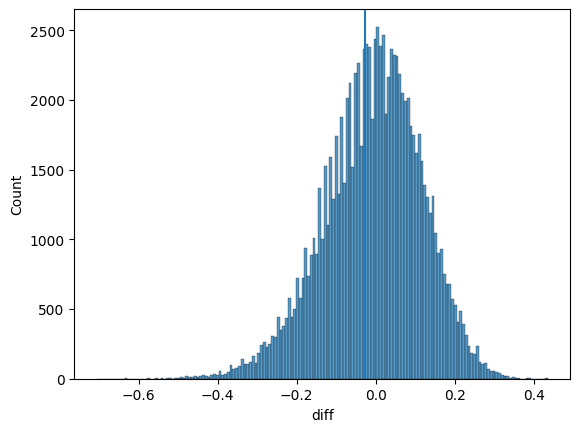

In [133]:
sns.histplot(perm_results['diff'], kde=False)

plt.axvline(diferencia_en_proporcion)

In [134]:
(perm_results['diff'] >= diferencia_en_proporcion).sum() / perm_results.shape[0]

##VAlor Alfa, que debe ser cercano a 5, este se aleja (59), por lo que no es significativo. 

0.59397

In [135]:
##Expresiones regulares - REEX
import re 

In [136]:
grouped_Categoría = df_merge_completo.groupby('Categoría')['Marca'].max()

In [137]:
grouped_Categoría

Categoría
Brandy                          Royale
Cervezas                    Warsteiner
Cognac                        Hennessy
Ginebra                      Tanqueray
Ron y aguardiente               Zacapa
Tequila y complementos          Sierra
Vinos                      Yellow Tail
Vodka                        Tanqueray
Whisky                    The Macallan
Name: Marca, dtype: object

In [138]:
grouped_Categoría[grouped_Categoría.str.contains('Tanqueray', case=False)]

Categoría
Ginebra    Tanqueray
Vodka      Tanqueray
Name: Marca, dtype: object

In [139]:
grouped_Categoría[grouped_Categoría.str.contains('The', case=False)]

Categoría
Whisky    The Macallan
Name: Marca, dtype: object

In [140]:
grouped_Categoría[grouped_Categoría.str.contains('The|Tanqueray', case=False)]

Categoría
Ginebra       Tanqueray
Vodka         Tanqueray
Whisky     The Macallan
Name: Marca, dtype: object

In [141]:
##Analisis de sentimiento - carga de dataset adicional

data_sentimiento = pd.read_csv("./Data/complaints.csv")

data_sentimiento = data_sentimiento.dropna(subset=['Consumer complaint narrative'])



data_sentimiento.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-01-18,Checking or savings account,Savings account,Opening an account,Account opened as a result of fraud,2 savings accounts opened on XXXX XXXX XXXX XX...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,NC,27710.0,NaN,Consent provided,Web,2023-01-18,Closed with explanation,Yes,NaN,6455471
14,2023-02-01,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,I discovered that some of the information on m...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,OK,74145.0,NaN,Consent provided,Web,2023-02-01,Closed with non-monetary relief,Yes,NaN,6509430
54,2023-02-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,This is my other request that I have been a vi...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CT,6424.0,NaN,Consent provided,Web,2023-02-01,Closed with non-monetary relief,Yes,NaN,6509168
57,2023-01-31,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,I had an excellent credit rating 6 months ago....,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,MS,39740.0,"Older American, Servicemember",Consent provided,Web,2023-01-31,Closed with explanation,Yes,NaN,6510321
76,2023-02-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Personal information incorrect,-- INCORRECT PERSONAL INFORMATION -- THIS COMP...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15212.0,NaN,Consent provided,Web,2023-02-01,Closed with non-monetary relief,Yes,NaN,6508809


In [142]:
data_sentimiento = data_sentimiento.groupby('Issue')['Consumer complaint narrative'].max()



data_sentimiento = data_sentimiento.str.lower()
data_sentimiento = data_sentimiento.str.strip() #quita espacios al principio
data_sentimiento = data_sentimiento.str.replace('[^\w\s]', '') #simbolos especiales
data_sentimiento = data_sentimiento.str.replace('\d', '') #numeros
data_sentimiento = data_sentimiento.str.replace('\\n', '') #saltos de linea
data_sentimiento = data_sentimiento.dropna()

C:\Users\ghenriquez\AppData\Local\Temp\ipykernel_34652\707605061.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\ghenriquez\AppData\Local\Temp\ipykernel_34652\707605061.py:8: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\ghenriquez\AppData\Local\Temp\ipykernel_34652\707605061.py:9: FutureWarning:

The default value of regex will change from True to False in a future version.



In [143]:
import nltk

tokenized = data_sentimiento.apply(nltk.word_tokenize)

all_words = tokenized.sum()
text = nltk.Text(all_words)



In [144]:
text.concordance('excellent', lines=20)

Displaying 1 of 1 matches:
 giving me the run around i had an excellent credit rating months ago xxxx i ha


In [145]:
text.similar('reporting')

In [146]:
text.common_contexts(['xxxx', 'well','account'])

No common contexts were found


In [147]:
freq_dist = nltk.FreqDist(all_words)

freq_dist

FreqDist({'xxxx': 101, 'i': 49, 'the': 41, 'to': 38, 'my': 37, 'and': 35, 'of': 23, 'that': 22, 'have': 21, 'a': 21, ...})

In [148]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ghenriquez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [149]:

english_stop_words = stopwords.words('english')
english_stop_words




['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [150]:
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]
all_words_except_stop_words

['dear',
 'syncbamazon',
 'xxxx',
 'xxxx',
 'disputed',
 'item',
 'credit',
 'reporting',
 'agency',
 'reported',
 'confirmed',
 'account',
 'valid',
 'honestly',
 'believe',
 'ever',
 'relationship',
 'collection',
 'agency',
 'original',
 'creditor',
 'also',
 'several',
 'inaccuracies',
 'account',
 'way',
 'reporting',
 'thats',
 'total',
 'violation',
 'fcra',
 'fdcpa',
 'laws',
 'regulations',
 'good',
 'faith',
 'effort',
 'resolve',
 'matter',
 'amicably',
 'must',
 'demand',
 'proof',
 'debt',
 'specifically',
 'alleged',
 'contract',
 'instrument',
 'bearing',
 'signature',
 'well',
 'proof',
 'authority',
 'matter',
 'absent',
 'proof',
 'must',
 'correct',
 'erroneous',
 'reports',
 'past',
 'debt',
 'mine',
 'writing',
 'request',
 'please',
 'provide',
 'following',
 'information',
 'please',
 'evidence',
 'authorization',
 'usc',
 'e',
 'usc',
 'f',
 'alleged',
 'matter',
 'authorization',
 'law',
 'collection',
 'information',
 'authorization',
 'law',
 'collection',
 '

In [151]:
freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)
freq_dist_no_stop_words

FreqDist({'xxxx': 101, 'account': 14, 'credit': 13, 'please': 8, 'name': 8, 'loan': 7, 'information': 6, 'xxxxxxxx': 6, 'alleged': 5, 'year': 5, ...})

In [152]:
freq_dist_no_stop_words.most_common(50)

[('xxxx', 101),
 ('account', 14),
 ('credit', 13),
 ('please', 8),
 ('name', 8),
 ('loan', 7),
 ('information', 6),
 ('xxxxxxxx', 6),
 ('alleged', 5),
 ('year', 5),
 ('card', 5),
 ('collection', 4),
 ('also', 4),
 ('matter', 4),
 ('proof', 4),
 ('debt', 4),
 ('authorization', 4),
 ('fraudulent', 4),
 ('im', 4),
 ('money', 4),
 ('like', 4),
 ('get', 4),
 ('back', 4),
 ('companies', 4),
 ('paid', 4),
 ('transferred', 4),
 ('mortg', 4),
 ('month', 4),
 ('mine', 3),
 ('provide', 3),
 ('evidence', 3),
 ('report', 3),
 ('ago', 3),
 ('sold', 3),
 ('last', 3),
 ('remove', 3),
 ('records', 3),
 ('items', 3),
 ('said', 3),
 ('phone', 3),
 ('cash', 3),
 ('trying', 3),
 ('installment', 3),
 ('recent', 3),
 ('accounts', 3),
 ('first', 3),
 ('loans', 3),
 ('newrez', 3),
 ('whole', 3),
 ('reporting', 2)]

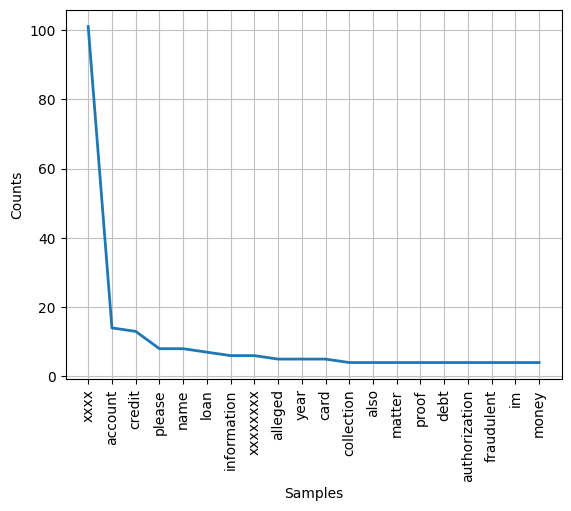

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [153]:
freq_dist_no_stop_words.plot(20)

In [230]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Collecting wordcloud
  Using cached wordcloud-1.8.2.2.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for wordcloud: started
  Running setup.py install for wordcloud: finished with status 'error'



  DEPRECATION: wordcloud is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  error: subprocess-exited-with-error
  
  × Running setup.py install for wordcloud did not run successfully.
  │ exit code: 1
  ╰─> [28 lines of output]
      running install
      c:\Users\ghenriquez\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\wordcloud
      copying wordcloud\color_from_image.py -> build\

In [154]:
pip install wordcloud-1.8.1-cp39-cp39-win_amd64.whl

Note: you may need to restart the kernel to use updated packages.


ERROR: wordcloud-1.8.1-cp39-cp39-win_amd64.whl is not a supported wheel on this platform.


In [227]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
wordcloud = WordCloud(max_font_size=100, background_color="green").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [159]:
##Analisis de polaridad/sentimiento perse de la misma columna de comentarios del problema

pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [162]:
from textblob import TextBlob


In [164]:
TextBlob(data_sentimiento.iloc[1])

TextBlob("xxxx  this is a heads up of xxxx selling an account that has been proven not mine and removed from my credit report a year ago today xxxx advised me in the attached screen shot that they have sold an account that is not mine to  xxxx xxxx xxxx xxxx xxxx xxxx xxxx xxxx ny xxxx take notice it is a fraudulent account and already proven i am attaching the screen shot of email sent by xxxx that they sold it proving i owe nothing to xxxx i am also attaching the fraudulent xxxx  account that was on my credit report last year xxxx and again was already removed for being fraudulent i am a victim of identity theft pursuant to section b remove this fraudulent account xxxx ending in xxxx was sold to xxxx xxxx xxxx on or about xxxx with a balance of  if and when it comes in to my profile  please remove")

In [165]:

TextBlob(data_sentimiento.iloc[1]).sentiment

##'polarity' va de -1 a 1, -1 siendo extremadamente negativo y 1 siendo extremadamente positivo.
##'subjectivity' va de 0 a 1, 0 siendo muy objetivo y 1 siendo muy subjetivo.

Sentiment(polarity=-0.037500000000000006, subjectivity=0.058333333333333334)

In [166]:
polarity = data_sentimiento.apply(lambda x: TextBlob(x).sentiment.polarity)
polarity.name = 'polarity'

In [167]:
df_with_polarity = pd.concat([data_sentimiento, polarity], axis=1)

In [168]:
df_with_polarity['polarity'] != 0

Issue
Attempts to collect debt not owed                                                   True
Improper use of your report                                                         True
Incorrect information on your report                                                True
Managing an account                                                                 True
Opening an account                                                                  True
Problem with a credit reporting company's investigation into an existing problem    True
Struggling to pay mortgage                                                          True
Name: polarity, dtype: bool

In [169]:
no_neutral = df_with_polarity[df_with_polarity['polarity'] != 0]

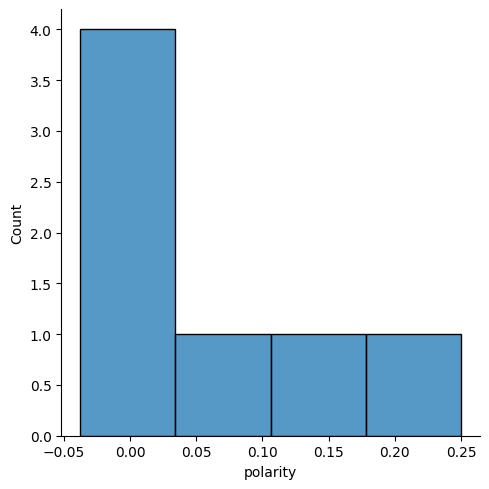

In [172]:
sns.displot(no_neutral['polarity']);

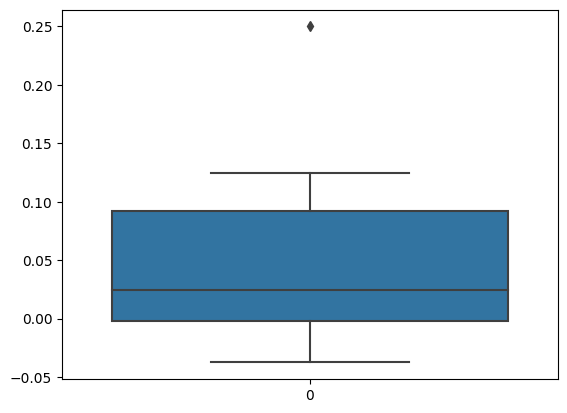

In [173]:
sns.boxplot(no_neutral['polarity']);

In [177]:
df_kmeans = df_merge_completo[['Categoría','Marca','SubMarca','Contenido','Precio','MontoSinIVA']]

df_kmeans['Producto'] = df_kmeans[df_kmeans.columns[0:3]].apply(lambda x: ' - '.join(x.dropna().astype(str)),axis=1)

C:\Users\ghenriquez\AppData\Local\Temp\ipykernel_34652\3892626032.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [179]:
df_kmeans = df_kmeans.groupby('Producto').agg({'MontoSinIVA' : 'sum', "Precio" : 'mean'})

In [180]:
df_kmeans

,MontoSinIVA,Precio
Producto,,
Brandy - Lafayette - Lafayette,1279.23,6.120857
Brandy - Royale - Royale,535.50,5.950000
Cervezas - Atlas - Atlas,74965.66,0.409030
Cervezas - Atlas Golden Light - Atlas Golden Light,272127.90,0.726579
Cervezas - Balboa - Balboa,38649.13,0.635773
...,...,...
Whisky - Old Parr - Old Parr Tribute,227.75,37.958333
Whisky - Passport - Passport,1020.98,11.471364
Whisky - Sir Albert - Sir Albert,28.50,9.500000


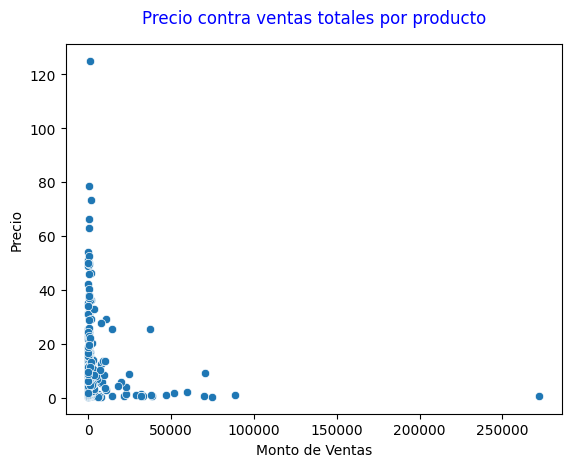

In [183]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Precio contra ventas totales por producto', pad=15, color = 'Blue')
ax.set_xlabel('Monto de Ventas')
ax.set_ylabel('Precio')

sns.scatterplot(x=df_kmeans['MontoSinIVA'], y=df_kmeans['Precio'], ax=ax);

In [186]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, max_iter=10000)

k_means.fit(df_kmeans[['MontoSinIVA', 'Precio']])

c:\Users\ghenriquez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(max_iter=10000, n_clusters=3)

In [187]:
centers = k_means.cluster_centers_

centers

array([[1.54185643e+03, 1.13776752e+01],
       [2.72127900e+05, 7.26578851e-01],
       [4.88385373e+04, 3.27189786e+00]])

C:\Users\ghenriquez\AppData\Local\Temp\ipykernel_34652\1332900402.py:9: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



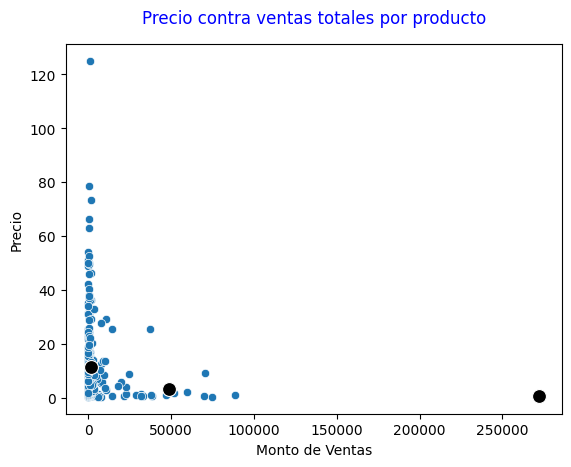

In [188]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Precio contra ventas totales por producto', pad=15, color = 'Blue')
ax.set_xlabel('Monto de Ventas')
ax.set_ylabel('Precio')


sns.scatterplot(x=df_kmeans['MontoSinIVA'], y=df_kmeans['Precio'], ax=ax, palette='rainbow');
sns.scatterplot(x=centers[:,0], y=centers[:,1], ax=ax, s=100, color='black');

In [189]:
clasificaciones = k_means.predict(df_kmeans[['MontoSinIVA', 'Precio']])

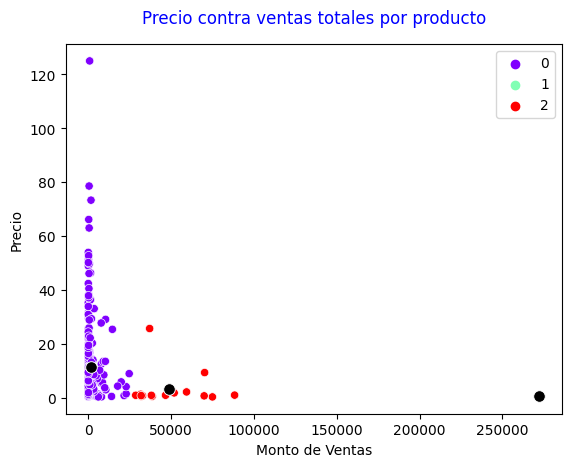

In [193]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Precio contra ventas totales por producto', pad=15, color = 'Blue')
ax.set_xlabel('Monto de Ventas')
ax.set_ylabel('Precio')


sns.scatterplot(x=df_kmeans['MontoSinIVA'], y=df_kmeans['Precio'], ax=ax, palette='rainbow', hue =clasificaciones );
sns.scatterplot(x=centers[:,0], y=centers[:,1], ax=ax, s=70, color='black');

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [197]:
###Matriz de confusión
##En la data base, se creará una columna para indicar si es cerveza o no lo que se vendió y esta se usará como columna de diagnóstico. 


df_merge_completo["Diagnostico"] = np.where(df_merge_completo["Categoría"] == 'Cervezas' ,   1 , 0)
#se crea el dataframe de trabajo

df_confusion = df_merge_completo[["Precio","Unidades","Litros","MontoSinIVA","Diagnostico"]]

df_confusion

,Precio,Unidades,Litros,MontoSinIVA,Diagnostico
0,3.85,2,1.000,7.70,0
1,0.49,2,0.355,0.98,1
2,0.98,2,0.355,1.96,1
3,0.63,2,0.355,1.26,1
4,0.40,2,0.355,0.80,1
...,...,...,...,...,...
31,0.41,-24,0.355,-9.84,1
32,0.41,-24,0.355,-9.84,1
33,0.41,-24,0.355,-9.84,1
34,0.41,-24,0.355,-9.84,1


In [201]:
X = df_confusion.drop(columns=['Diagnostico'])
y = df_confusion['Diagnostico']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [202]:
y_pred = logreg.predict(X_test)

In [205]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[14220,  2787],
       [  434, 75103]], dtype=int64)

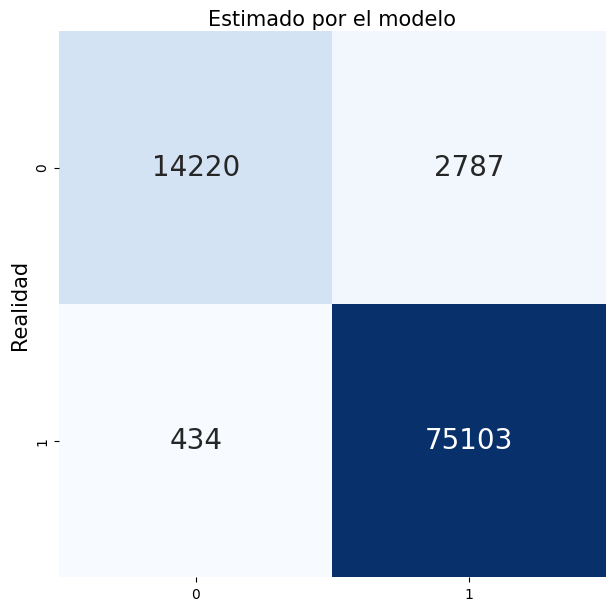

In [206]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [207]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.9642187700603415
Exactitud: 0.9651949343015215
Sensibilidad: 0.9942544713186915
Especificidad: 0.8361263009349091


In [208]:
y_pred_proba = logreg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[3.50809085e-06, 9.99996492e-01],
       [1.63874922e-02, 9.83612508e-01],
       [9.29208439e-03, 9.90707916e-01],
       [1.79636594e-01, 8.20363406e-01],
       [1.63874922e-02, 9.83612508e-01],
       [9.99999998e-01, 1.57680239e-09],
       [1.56628453e-02, 9.84337155e-01],
       [1.68216762e-02, 9.83178324e-01],
       [4.89770043e-01, 5.10229957e-01],
       [9.29208439e-03, 9.90707916e-01]])

In [209]:
from sklearn.metrics import roc_curve, auc

In [210]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

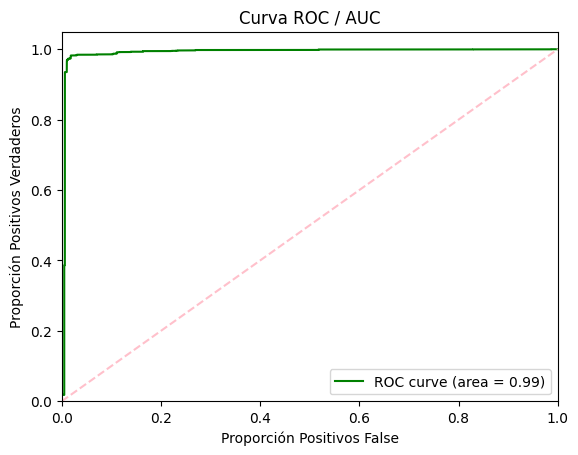

In [212]:
plt.figure()
plt.plot(fpr, tpr, color='green',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='pink', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()